<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center> <h3> Module 5: Machine Learning 2</h3> </center>
<center> <h4> Unidad 4: Deep Learning NLP</h4> </center>
<center> <h4> Ejemplos</h4> </center>

# Limpieza, preprocesado y EDA

Lo primero será preparar el entorno de Colab instalando e importando las librerías.

In [ ]:
import os
import collections

import string
import re

from nltk import TreebankWordTokenizer
from nltk.util import ngrams
import nltk
nltk.download('stopwords') # bajar la primera vez
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
nltk.download('wordnet') # bajar la primera vez
nltk.download('omw-1.4') # bajar la primera vez
from nltk.stem import WordNetLemmatizer


!python -m spacy download es_core_news_sm # bajar la primera vez
import spacy

from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


2023-07-02 00:02:04.954250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 00:02:06.031024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
# cargamos el archivo de texto (si usáis colab, recordad de subirlo a Files)

filepath = 'la_regenta.txt'

file = open(filepath, 'rt')
texto = file.read()
file.close()

texto

'Creo que fue Wieland quien dijo _que los pensamientos de los hombres\nvalen más que sus acciones, y las buenas novelas más que el género\nhumano_. Podrá esto no ser verdad; pero es hermoso y consolador.\nCiertamente, parece que nos ennoblecemos trasladándonos de este mundo al\notro, de la realidad en que somos tan malos a la ficción en que valemos\nmás que aquí, y véase por qué, cuando un cristiano el hábito de pasar\nfácilmente a mejor vida, inventando personas y tejiendo sucesos a imagen\nde los de por acá, le cuesta no poco trabajo volver a este mundo.\nTambién digo que si grata es la tarea de fabricar género humano\nrecreándonos en ver cuánto superan las ideales figurillas, por toscas\nque sean, a las vivas figuronas que a nuestro lado bullen, el regocijo\nes más intenso cuando visitamos los talleres ajenos, pues el andar\nsiempre en los propios trae un desasosiego que amengua los placeres de\nlo que llamaremos creación, por no tener mejor nombre que darle.\n\nEsto que digo de vis

Una manera de hacerlo es con la función de Python split(), que divide el texto por donde hay espacios en blanco:

In [ ]:
words = texto.split()
print(words[:100])

['Creo', 'que', 'fue', 'Wieland', 'quien', 'dijo', '_que', 'los', 'pensamientos', 'de', 'los', 'hombres', 'valen', 'más', 'que', 'sus', 'acciones,', 'y', 'las', 'buenas', 'novelas', 'más', 'que', 'el', 'género', 'humano_.', 'Podrá', 'esto', 'no', 'ser', 'verdad;', 'pero', 'es', 'hermoso', 'y', 'consolador.', 'Ciertamente,', 'parece', 'que', 'nos', 'ennoblecemos', 'trasladándonos', 'de', 'este', 'mundo', 'al', 'otro,', 'de', 'la', 'realidad', 'en', 'que', 'somos', 'tan', 'malos', 'a', 'la', 'ficción', 'en', 'que', 'valemos', 'más', 'que', 'aquí,', 'y', 'véase', 'por', 'qué,', 'cuando', 'un', 'cristiano', 'el', 'hábito', 'de', 'pasar', 'fácilmente', 'a', 'mejor', 'vida,', 'inventando', 'personas', 'y', 'tejiendo', 'sucesos', 'a', 'imagen', 'de', 'los', 'de', 'por', 'acá,', 'le', 'cuesta', 'no', 'poco', 'trabajo', 'volver', 'a', 'este', 'mundo.']


El problema es que la puntuación queda como parte de las palabras obtenidas. Por ello, una posible estrategia es eliminar la puntuación a posteriori, usando expresiones regulares o regex.

Ejecuta la siguiente línea de código. Este método nos proporciona un listado de marcas de puntuación:

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Podemos usar este listado para eliminarlas de nuestra lista de palabras con el siguiente par de líneas:

- Con **re.compile** creamos una expresión regular que contenga los distintos signos de puntuación
- Con la función **sub** reemplazamos los signos de puntuación con la cadena de texto vacía

In [ ]:
re_punc = re.compile('[{}]'.format(re.escape(string.punctuation)))

# eliminamos la puntuación
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:200])

['Creo', 'que', 'fue', 'Wieland', 'quien', 'dijo', 'que', 'los', 'pensamientos', 'de', 'los', 'hombres', 'valen', 'más', 'que', 'sus', 'acciones', 'y', 'las', 'buenas', 'novelas', 'más', 'que', 'el', 'género', 'humano', 'Podrá', 'esto', 'no', 'ser', 'verdad', 'pero', 'es', 'hermoso', 'y', 'consolador', 'Ciertamente', 'parece', 'que', 'nos', 'ennoblecemos', 'trasladándonos', 'de', 'este', 'mundo', 'al', 'otro', 'de', 'la', 'realidad', 'en', 'que', 'somos', 'tan', 'malos', 'a', 'la', 'ficción', 'en', 'que', 'valemos', 'más', 'que', 'aquí', 'y', 'véase', 'por', 'qué', 'cuando', 'un', 'cristiano', 'el', 'hábito', 'de', 'pasar', 'fácilmente', 'a', 'mejor', 'vida', 'inventando', 'personas', 'y', 'tejiendo', 'sucesos', 'a', 'imagen', 'de', 'los', 'de', 'por', 'acá', 'le', 'cuesta', 'no', 'poco', 'trabajo', 'volver', 'a', 'este', 'mundo', 'También', 'digo', 'que', 'si', 'grata', 'es', 'la', 'tarea', 'de', 'fabricar', 'género', 'humano', 'recreándonos', 'en', 'ver', 'cuánto', 'superan', 'las', 

Otra manera es dividir el texto en secuencias de caracteres alfanuméricos, usando el método **.split()** del paquete **re** junto con el metacaracter **\W** que identifica las palabras:

**words = re.split(r'\W+', text)**

Para poner todo el texto en minúsculas, utilizaremos **.lower()**:

In [ ]:
words_lower = [word.lower() for word in stripped]
print(words_lower[:100])

['creo', 'que', 'fue', 'wieland', 'quien', 'dijo', 'que', 'los', 'pensamientos', 'de', 'los', 'hombres', 'valen', 'más', 'que', 'sus', 'acciones', 'y', 'las', 'buenas', 'novelas', 'más', 'que', 'el', 'género', 'humano', 'podrá', 'esto', 'no', 'ser', 'verdad', 'pero', 'es', 'hermoso', 'y', 'consolador', 'ciertamente', 'parece', 'que', 'nos', 'ennoblecemos', 'trasladándonos', 'de', 'este', 'mundo', 'al', 'otro', 'de', 'la', 'realidad', 'en', 'que', 'somos', 'tan', 'malos', 'a', 'la', 'ficción', 'en', 'que', 'valemos', 'más', 'que', 'aquí', 'y', 'véase', 'por', 'qué', 'cuando', 'un', 'cristiano', 'el', 'hábito', 'de', 'pasar', 'fácilmente', 'a', 'mejor', 'vida', 'inventando', 'personas', 'y', 'tejiendo', 'sucesos', 'a', 'imagen', 'de', 'los', 'de', 'por', 'acá', 'le', 'cuesta', 'no', 'poco', 'trabajo', 'volver', 'a', 'este', 'mundo']


Otra de las cosas que podemos hacer es eliminar aquellos caracteres que se repiten múltiples veces para dar énfasis:

In [ ]:
#eliminar repeticiones de puntuación y letras con regexes
saludo="Holaaaa!!"
saludo=re.sub(r'(.)\1+', r'\1', saludo)
saludo

'Hola!'

## Tokenización

Un buen tokenizador es el Treebank Word Tokenizer, de NLTK. Esta herramienta incluye **normas** que, por ejemplo, retienen las comas o puntos de los números decimales y contienen normas para contracciones, como las que encontramos en inglés.

Por ejemplo, “I’m” es toquenizado como **[“I”, “’m”]**, es decir, como dos palabras distintas. Como veremos, esto será útil en los siguientes pasos del pipeline de limpieza.

In [ ]:
frase ="""
In the Mediterranean, ice cream appears to have been accessible to ordinary people by the mid-eighteenth century.
"""
tokenizer = TreebankWordTokenizer()
vocab = tokenizer.tokenize(frase)
vocab

['In',
 'the',
 'Mediterranean',
 ',',
 'ice',
 'cream',
 'appears',
 'to',
 'have',
 'been',
 'accessible',
 'to',
 'ordinary',
 'people',
 'by',
 'the',
 'mid-eighteenth',
 'century',
 '.']

Vamos a ver la forma de hacer la limpieza manual que hemos visto antes a través de esta librería sobre un texto que guardamos en la variable icecream_text:

In [ ]:
icecream_text=""""
The origins of frozen desserts are obscure although several accounts exist about their history.
Some sources describe ice cream-like foods as originating in Persia as far back as 550 BCE.
Its spread throughout Europe is sometimes attributed to Moorish traders, but more often to Marco Polo.
Though it's not mentioned in any of his writings, Polo is often credited with introducing sorbet-style
desserts to Italy after learning of it during his travels to China. The Italian duchess Catherine de' Medici
is said to have introduced flavored sorbet ices to France when she brought some Italian chefs with her
to France upon marrying the Duke of Orléans (Henry II of France) in 1533. One hundred years later,
Charles I of England was reportedly so impressed by the "frozen snow" that he offered his own ice cream maker a
lifetime pension in return for keeping the formula secret, so that ice cream could be a royal prerogative.
There is no evidence to support any of these legends.

Snow collected from the lower slopes of mountains was unsanitary and iced drinks were believed to cause convulsions,
colic and a host of other ailments.

Despite this, ice and snow were prized ingredients in ancient cuisines including Japanese, Chinese,
Greek and Roman cuisines. Ancient Egyptian hieroglyphs show a snow-filled vessel next to fruit juice.
There are Tang dynasty records of a chilled dessert made with flour, camphor and water buffalo milk
and recipes for snow-chilled sweets are included in a 1st-century Roman recipe book. There are Persian records
from the 2nd century AD for sweetened chilled drinks with ice made by freezing water in the desert at night.

Ice cream production became easier only with the discovery of the endothermic effect. Prior to this, cream
could only be chilled but not frozen. It was the addition of salt, that lowered the melting point of ice,
which had the effect of drawing heat from the cream and allowing it to freeze. The earliest written description
of the process is known not from culinary texts, but the 13th-century writings of Ibn Abu Usaybia concerning
medicine. The technique of "freezing" is not known from any European sources prior to the 16th century.
During the sixteenth century authors made reference to the refrigerant effect that happened when salt was added
to ice causing it to freeze. But it wasn't until the latter part of the seventeenth century that sorbets and ice
creams were made using this process.
"""

Lo primero será tokenizar el texto:

In [ ]:
#we choose the most common ones
tokenizer = TreebankWordTokenizer()
vocab = tokenizer.tokenize(icecream_text)
vocab

['``',
 'The',
 'origins',
 'of',
 'frozen',
 'desserts',
 'are',
 'obscure',
 'although',
 'several',
 'accounts',
 'exist',
 'about',
 'their',
 'history.',
 'Some',
 'sources',
 'describe',
 'ice',
 'cream-like',
 'foods',
 'as',
 'originating',
 'in',
 'Persia',
 'as',
 'far',
 'back',
 'as',
 '550',
 'BCE.',
 'Its',
 'spread',
 'throughout',
 'Europe',
 'is',
 'sometimes',
 'attributed',
 'to',
 'Moorish',
 'traders',
 ',',
 'but',
 'more',
 'often',
 'to',
 'Marco',
 'Polo.',
 'Though',
 'it',
 "'s",
 'not',
 'mentioned',
 'in',
 'any',
 'of',
 'his',
 'writings',
 ',',
 'Polo',
 'is',
 'often',
 'credited',
 'with',
 'introducing',
 'sorbet-style',
 'desserts',
 'to',
 'Italy',
 'after',
 'learning',
 'of',
 'it',
 'during',
 'his',
 'travels',
 'to',
 'China.',
 'The',
 'Italian',
 'duchess',
 'Catherine',
 'de',
 "'",
 'Medici',
 'is',
 'said',
 'to',
 'have',
 'introduced',
 'flavored',
 'sorbet',
 'ices',
 'to',
 'France',
 'when',
 'she',
 'brought',
 'some',
 'Italian',
 '

Sobre nuestros tokens, nos quedamos con aquellos que tengan caracteres alfabéticos con la función isalpha().

In [ ]:
words = []
for word in vocab:
  if word.isalpha():
    words.append(word)
words

['The',
 'origins',
 'of',
 'frozen',
 'desserts',
 'are',
 'obscure',
 'although',
 'several',
 'accounts',
 'exist',
 'about',
 'their',
 'Some',
 'sources',
 'describe',
 'ice',
 'foods',
 'as',
 'originating',
 'in',
 'Persia',
 'as',
 'far',
 'back',
 'as',
 'Its',
 'spread',
 'throughout',
 'Europe',
 'is',
 'sometimes',
 'attributed',
 'to',
 'Moorish',
 'traders',
 'but',
 'more',
 'often',
 'to',
 'Marco',
 'Though',
 'it',
 'not',
 'mentioned',
 'in',
 'any',
 'of',
 'his',
 'writings',
 'Polo',
 'is',
 'often',
 'credited',
 'with',
 'introducing',
 'desserts',
 'to',
 'Italy',
 'after',
 'learning',
 'of',
 'it',
 'during',
 'his',
 'travels',
 'to',
 'The',
 'Italian',
 'duchess',
 'Catherine',
 'de',
 'Medici',
 'is',
 'said',
 'to',
 'have',
 'introduced',
 'flavored',
 'sorbet',
 'ices',
 'to',
 'France',
 'when',
 'she',
 'brought',
 'some',
 'Italian',
 'chefs',
 'with',
 'her',
 'to',
 'France',
 'upon',
 'marrying',
 'the',
 'Duke',
 'of',
 'Orléans',
 'Henry',
 'II

Puede ser complicado ver el impacto en un texto tan grande, por eso te invito a ejecutar la siguiente celda.

In [ ]:
numeros_y_palabras = ["caimán", " ", "ligero", "56", "otro", "comía", "astur-leonés", "?"]
palabras=[]
for word in numeros_y_palabras:
  if word.isalpha():
    palabras.append(word)
palabras

['caimán', 'ligero', 'otro', 'comía']

Hasta ahora, hemos asumido que el vocabulario está formado por palabras individuales, pero hay buenas razones para incluir en él secuencias de varias palabras, lo que se conoce normalmente como n-gramas.

Un n-grama es una **secuencia** de n palabras. Por ejemplo, un 2-grama (en inglés, “bigram”) es una secuencia de dos palabras.

En la frase que acabamos de ver, tenemos un caso muy claro de por qué debemos incluir n-gramas en nuestro lexikon: “ice cream”.

Nuestra tokenización ha considerado que “ice cream” son dos palabras distintas, pero claramente funciona como una **unidad semántica** y estaría bien que nuestra representación numérica de esta frase capturara esta unidad. Un ejemplo de 3-grama sería “Johann Sebastian Bach”. Pero los n-gramas no tienen porqué significar alguna cosa especial ni tienen porqué formar palabras compuestas. Simplemente tienen que ser suficientemente frecuentes.

Como veremos, (en general) la manera de representar textos numéricamente no respeta el **orden** de las palabras. Es decir, si en una frase en inglés sale la expresión “is not”, nuestra representación captura el hecho de que salen estas dos palabras, “is” y “not”, pero no el hecho de que aparezcan seguidas. Si incluimos en nuestro vocabulario 2-gramas frecuentes, como “is not”, esta información **no se pierde**.

In [ ]:
frase="""
In the Mediterranean, ice cream appears to have been accessible to ordinary people by the mid-eighteenth century.
"""

tokenizer = TreebankWordTokenizer()
vocab = tokenizer.tokenize(frase)

bigramas = list(ngrams(vocab,2))
[" ".join(x) for x in bigramas]

['In the',
 'the Mediterranean',
 'Mediterranean ,',
 ', ice',
 'ice cream',
 'cream appears',
 'appears to',
 'to have',
 'have been',
 'been accessible',
 'accessible to',
 'to ordinary',
 'ordinary people',
 'people by',
 'by the',
 'the mid-eighteenth',
 'mid-eighteenth century',
 'century .']

Puedes ver el resultado sobre el texto más largo que hemos creado anteriormente.

In [ ]:
bigramas = list(ngrams(words,2))
[" ".join(x) for x in bigramas]

['The origins',
 'origins of',
 'of frozen',
 'frozen desserts',
 'desserts are',
 'are obscure',
 'obscure although',
 'although several',
 'several accounts',
 'accounts exist',
 'exist about',
 'about their',
 'their Some',
 'Some sources',
 'sources describe',
 'describe ice',
 'ice foods',
 'foods as',
 'as originating',
 'originating in',
 'in Persia',
 'Persia as',
 'as far',
 'far back',
 'back as',
 'as Its',
 'Its spread',
 'spread throughout',
 'throughout Europe',
 'Europe is',
 'is sometimes',
 'sometimes attributed',
 'attributed to',
 'to Moorish',
 'Moorish traders',
 'traders but',
 'but more',
 'more often',
 'often to',
 'to Marco',
 'Marco Though',
 'Though it',
 'it not',
 'not mentioned',
 'mentioned in',
 'in any',
 'any of',
 'of his',
 'his writings',
 'writings Polo',
 'Polo is',
 'is often',
 'often credited',
 'credited with',
 'with introducing',
 'introducing desserts',
 'desserts to',
 'to Italy',
 'Italy after',
 'after learning',
 'learning of',
 'of it

Para poder obtener los N-gramas más frecuentes podemos usar la siguiente pieza de código con la función Counter.

In [ ]:
[" ".join(x) for x in bigramas]

# get the frequency of each bigram in our corpus
bigramasfreq = collections.Counter(bigramas)

# what are the ten most popular ngrams in this Spanish corpus?
most_freq = bigramasfreq.most_common(15)
most_freq

[(('from', 'the'), 3),
 (('of', 'the'), 3),
 (('any', 'of'), 2),
 (('to', 'The'), 2),
 (('to', 'France'), 2),
 (('ice', 'cream'), 2),
 (('cream', 'could'), 2),
 (('There', 'are'), 2),
 (('it', 'to'), 2),
 (('to', 'the'), 2),
 (('The', 'origins'), 1),
 (('origins', 'of'), 1),
 (('of', 'frozen'), 1),
 (('frozen', 'desserts'), 1),
 (('desserts', 'are'), 1)]

Podemos añadir esos bigramas más frecuentes a nuestro diccionario de palabras con la siguiente pieza de código:

In [ ]:
#put them altogether
words_ngrams = words
most_freq_list=[" ".join(tuple[0]) for tuple in most_freq]
words_ngrams.extend(most_freq_list)

words_ngrams

['The',
 'origins',
 'of',
 'frozen',
 'desserts',
 'are',
 'obscure',
 'although',
 'several',
 'accounts',
 'exist',
 'about',
 'their',
 'Some',
 'sources',
 'describe',
 'ice',
 'foods',
 'as',
 'originating',
 'in',
 'Persia',
 'as',
 'far',
 'back',
 'as',
 'Its',
 'spread',
 'throughout',
 'Europe',
 'is',
 'sometimes',
 'attributed',
 'to',
 'Moorish',
 'traders',
 'but',
 'more',
 'often',
 'to',
 'Marco',
 'Though',
 'it',
 'not',
 'mentioned',
 'in',
 'any',
 'of',
 'his',
 'writings',
 'Polo',
 'is',
 'often',
 'credited',
 'with',
 'introducing',
 'desserts',
 'to',
 'Italy',
 'after',
 'learning',
 'of',
 'it',
 'during',
 'his',
 'travels',
 'to',
 'The',
 'Italian',
 'duchess',
 'Catherine',
 'de',
 'Medici',
 'is',
 'said',
 'to',
 'have',
 'introduced',
 'flavored',
 'sorbet',
 'ices',
 'to',
 'France',
 'when',
 'she',
 'brought',
 'some',
 'Italian',
 'chefs',
 'with',
 'her',
 'to',
 'France',
 'upon',
 'marrying',
 'the',
 'Duke',
 'of',
 'Orléans',
 'Henry',
 'II

Comprobamos que  la palabra “ice cream” forma parte de nuestro diccionario:

In [ ]:
"ice cream" in words

True

## Stop-words

Si nos fijamos en los n-gramas más frecuentes que hemos visto en el código anterior, veremos que entre los más frecuentes encontramos muchos que al ser tan frecuente en cualquier texto, **pierden su utilidad o poder predictivo**.  De los que vimos antes es lo que pasa con los N-gramas “from the” y “of the”. Palabras como “from”, “the” o “of” son lo que llamamos stop-words.

Éstas son palabras con **poco significado léxico**, que hacen contribuciones más estructurales al significado de la frase en la que se encuentran. Es por eso, que al limpiar nuestros textos normalmente las tenemos que eliminar. Además los “stop-words” constituyen una porción tan grande de nuestros textos que al eliminarlos también nos ahorramos una gran parte de carga computacional.

NLTK tiene listas preparadas de stop-words para varios idiomas. La lista para el castellano incluye 313 palabras:

In [ ]:
es_stop_words = stopwords.words('spanish')
len(es_stop_words)

313

Fijaros que estas palabras están todas en minúsculas y no contienen signos de puntuación.  Así que para poder filtrarlas, nuestro vocabulario tiene que estar en las mismas condiciones, por eso es necesario aplicar la normalización que hemos visto antes.

Vamos a ver el listado de **stop-words** en inglés:

In [ ]:
eng_stop_words = stopwords.words('english')
print(eng_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Una pregunta que nos puede surgir es ver los lenguajes para los que ofrece soporte NLTK, eso podemos consultarlo con la siguiente instrucción:

In [ ]:
stopwords.fileids() #miramos para qué idiomas están disponibles los stopwords de NLTK

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

Vamos a elegir por ejemplo las stop-words en portugués:

In [ ]:
por_stop_words = stopwords.words('portuguese')
por_stop_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

Vamos a limpiar el listado anterior de palabras eliminando las stop-words después de normalizar todas las palabras a minúsculas.

Si nos fijamos, en la lista resultante aún aparecen stopwords como parte de bigramas. Para eliminarlos tendríamos que filtrar los stopwords antes de construir los bigramas

In [ ]:
clean_words = [w for w in words if not w.lower() in eng_stop_words]
clean_words

#si nos fijamos, en la lista resultante aún aparecen stopwords como parte de bigramas. Para eliminarlos tendríamos que filtrar los stopwords antes de construir los bigramas

['origins',
 'frozen',
 'desserts',
 'obscure',
 'although',
 'several',
 'accounts',
 'exist',
 'sources',
 'describe',
 'ice',
 'foods',
 'originating',
 'Persia',
 'far',
 'back',
 'spread',
 'throughout',
 'Europe',
 'sometimes',
 'attributed',
 'Moorish',
 'traders',
 'often',
 'Marco',
 'Though',
 'mentioned',
 'writings',
 'Polo',
 'often',
 'credited',
 'introducing',
 'desserts',
 'Italy',
 'learning',
 'travels',
 'Italian',
 'duchess',
 'Catherine',
 'de',
 'Medici',
 'said',
 'introduced',
 'flavored',
 'sorbet',
 'ices',
 'France',
 'brought',
 'Italian',
 'chefs',
 'France',
 'upon',
 'marrying',
 'Duke',
 'Orléans',
 'Henry',
 'II',
 'France',
 'One',
 'hundred',
 'years',
 'later',
 'Charles',
 'England',
 'reportedly',
 'impressed',
 'frozen',
 'snow',
 'offered',
 'ice',
 'cream',
 'maker',
 'lifetime',
 'pension',
 'return',
 'keeping',
 'formula',
 'secret',
 'ice',
 'cream',
 'could',
 'royal',
 'evidence',
 'support',
 'Snow',
 'collected',
 'lower',
 'slopes',
 '

## Stemming vs. lemmatizing

Stemming y lemmatizing son técnicas que se usan para unificar palabras que, desde el punto de vista léxico son las mismas.

Por ejemplo, “estructura” y “estructuras” tienen el mismo contenido léxico. Lo único que cambia es que en un caso está en singular y en el otro, en plural. Lo mismo ocurre con “siendo”, “es”, “era” y “será”.

Para hacer que un programa pueda identificar estas relaciones, lo que hacemos es transformar estas palabras en una sola: su raíz. Por ejemplo, en el primer caso, eliminamos el sufijo que indica pluralidad (“-s”), obteniendo una única palabra en cada caso: “estructura”.

Para llegar a la raíz de una palabra, podemos proceder de varias maneras.

**Stemming**

La primera es la que llamamos “stemming”. El “stemming” consiste en eliminar sufijos y prefijos habituales, quedándonos con lo que queda.

NLTK nos proporciona varios stemmers distintos (distintos **conjuntos de normas** para eliminar prefijos y sufijos). Por ejemplo, el Porter Stemmer, Lancaster Stemmer o Snowball Stemmer.

Para verlos en acción vamos a inicializarlos, observa que el **SnowballStemmer** necesita que le indiquemos el idioma:

In [ ]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english") #requiere argumento especificando lengua

Ahora vamos a definir un conjunto de palabras de test y vamos a probar los distintos stemmers:

In [ ]:
test_words = ["wheather", "perhaps", "baby", "does", "am", "trousers", "table"]

roots_porter = [porter.stem(word) for word in test_words]
print(roots_porter)
roots_lancaster = [lancaster.stem(word) for word in test_words]
print(roots_lancaster)
roots_snowball = [snowball.stem(word) for word in test_words]
print(roots_snowball)

['wheather', 'perhap', 'babi', 'doe', 'am', 'trouser', 'tabl']
['wheath', 'perhap', 'baby', 'doe', 'am', 'trous', 'tabl']
['wheather', 'perhap', 'babi', 'doe', 'am', 'trouser', 'tabl']


El Snowball Stemmer nos permite escoger distintas lenguas, entre ellas, el castellano. Puedes verlo en acción en la siguiente pieza de código.

In [ ]:
spanish_words = ["tiempo", "quizás", "bebé", "hace", "soy", "pantalones"]

snowball_es = SnowballStemmer("spanish")
roots_snowball = [snowball_es.stem(word) for word in spanish_words]
print(roots_snowball)

['tiemp', 'quizas', 'beb', 'hac', 'soy', 'pantalon']


A continuación, vamos a aplicar los distintos stemmers en el listado de palabras limpias que nos había quedado del paso anterior:

In [ ]:
roots_porter = [porter.stem(word) for word in clean_words]
roots_porter

roots_lancaster = [lancaster.stem(word) for word in clean_words]
roots_lancaster

roots_snowball = [snowball.stem(word) for word in clean_words]
roots_snowball

['origin',
 'frozen',
 'dessert',
 'obscur',
 'although',
 'sever',
 'account',
 'exist',
 'sourc',
 'describ',
 'ice',
 'food',
 'origin',
 'persia',
 'far',
 'back',
 'spread',
 'throughout',
 'europ',
 'sometim',
 'attribut',
 'moorish',
 'trader',
 'often',
 'marco',
 'though',
 'mention',
 'write',
 'polo',
 'often',
 'credit',
 'introduc',
 'dessert',
 'itali',
 'learn',
 'travel',
 'italian',
 'duchess',
 'catherin',
 'de',
 'medici',
 'said',
 'introduc',
 'flavor',
 'sorbet',
 'ice',
 'franc',
 'brought',
 'italian',
 'chef',
 'franc',
 'upon',
 'marri',
 'duke',
 'orléan',
 'henri',
 'ii',
 'franc',
 'one',
 'hundr',
 'year',
 'later',
 'charl',
 'england',
 'report',
 'impress',
 'frozen',
 'snow',
 'offer',
 'ice',
 'cream',
 'maker',
 'lifetim',
 'pension',
 'return',
 'keep',
 'formula',
 'secret',
 'ice',
 'cream',
 'could',
 'royal',
 'evid',
 'support',
 'snow',
 'collect',
 'lower',
 'slope',
 'mountain',
 'unsanitari',
 'ice',
 'drink',
 'believ',
 'caus',
 'convuls'

Otra opción que podemos seleccionar es la de no recortar los stopwords como vemos a continuación. Vemos que la palabra “does” se mantiene intacta.

In [ ]:
snowball_no_sw = SnowballStemmer("english", ignore_stopwords=True)
roots_snowball = [snowball_no_sw.stem(word) for word in test_words]
print(roots_snowball)

['wheather', 'perhap', 'babi', 'does', 'am', 'trouser', 'tabl']


**Lemmatizing**

Otro tipo de estrategia para unificar palabras y capturar su significado léxico es la lematización. La lematización es un poco más sofisticada que el “stemming”, ya que tiene en cuenta la estructura morfológica de las palabras para encontrar su raíz y usa un diccionario para transformar palabras en su palabra raíz (o “lemma”).

Así, el resultado del “stemming” no tiene porqué ser una palabra, pero el de la lematización, sí.

NLTK también viene con herramientas para realizar este tipo de limpieza. El lemmatizer de NLTK se llama WordNetLemmatizer. Programáticamente, su uso es muy similar al de los “stemmers” que hemos visto. Vamos a ponerlo en acción usando un conjunto de dos palabras e iterando sobre ellas con un bucle for.

In [ ]:
more_words=["difficulties", "difficulty", "winner", "jumping", "shoes", "learning"]

lemmatizer = WordNetLemmatizer()

lemmatized_words = []
for word in more_words:
  new_word = lemmatizer.lemmatize(word)
  lemmatized_words.append(new_word)

lemmatized_words

['difficulty', 'difficulty', 'winner', 'jumping', 'shoe', 'learning']

Una de las limitaciones de NLTK es que no tiene un paquete para lematizar en idiomas distintos del inglés.

Una biblioteca que, en cambio, sí proporciona esta funcionalidad es SpaCy.

Por ahora, nos centramos en la tarea de lematización en castellano. Lo primero que tenemos que hacer es bajarnos los modelos pre-entrenados del castellano. En colab lo hacemos ejecutando el siguiente comando, que hemos ejecutado previamente en la celda inicial que preparaba el entorno de trabajo: **!python -m spacy download es_core_news_sm**

Después importamos la biblioteca y cargamos el modelo:

In [ ]:
nlp = spacy.load('es_core_news_sm')

Finalmente, instanciamos el lematizador y lo aplicamos a nuestro texto (no sin antes crear un objeto de Spacy tipo Doc, mediante el uso de la función nlp() al que le proporcionamos el texto original:

In [ ]:
lemmatizer = nlp.get_pipe("lemmatizer")

print(lemmatizer.mode) # 'rule'

doc = nlp(texto)
print([token.lemma_ for token in doc])

rule
['creer', 'que', 'ser', 'Wieland', 'quien', 'decir', '_', 'que', 'el', 'pensamiento', 'de', 'el', 'hombre', '\n', 'valer', 'más', 'que', 'su', 'acción', ',', 'y', 'el', 'buena', 'novela', 'más', 'que', 'el', 'género', '\n', 'humano', '_', '.', 'poder', 'este', 'no', 'ser', 'verdad', ';', 'pero', 'ser', 'hermoso', 'y', 'consolador', '.', '\n', 'ciertamente', ',', 'parecer', 'que', 'yo', 'ennoblecer', 'trasladándono', 'de', 'este', 'mundo', 'al', '\n', 'otro', ',', 'de', 'el', 'realidad', 'en', 'que', 'ser', 'tanto', 'malo', 'a', 'el', 'ficción', 'en', 'que', 'valer', '\n', 'más', 'que', 'aquí', ',', 'y', 'véar', 'por', 'qué', ',', 'cuando', 'uno', 'cristiano', 'el', 'hábito', 'de', 'pasar', '\n', 'fácilmente', 'a', 'mejor', 'vida', ',', 'inventar', 'persona', 'y', 'tejer', 'suceso', 'a', 'imagen', '\n', 'de', 'el', 'de', 'por', 'acá', ',', 'él', 'costar', 'no', 'poco', 'trabajar', 'volver', 'a', 'este', 'mundo', '.', '\n', 'también', 'decir', 'que', 'si', 'gratar', 'ser', 'el', 'ta

Para finalizar esta parte del módulo, os invitamos a aplicar lo que hemos visto con siguiente ejercicio:

1. Selecciona un texto en español
2. Crea una función que se llame **clean_tokens** que, dado un texto, devuelva una lista de tokens limpios:
- en minúscula
- sin signos de puntuación
- sin stopwords
- stemizados o lematizados
1. ¿Puedes resolverlo en una sola línea de código?

In [ ]:
def clean_tokens(text_data, language):
  tokenizer = TreebankWordTokenizer()
  tokens = tokenizer.tokenize(text_data)

  lowercased=[w.lower() for w in tokens]

  no_punct=[word for word in lowercased if word.isalpha()]

  stop_words = stopwords.words(language)
  no_sw = [w for w in no_punct if not w in stop_words]

  lemmatizer = WordNetLemmatizer()
  clean_tokens = [lemmatizer.lemmatize(word) for word in no_sw]

  return clean_tokens

clean_tokens(icecream_text, "english")

['origin',
 'frozen',
 'dessert',
 'obscure',
 'although',
 'several',
 'account',
 'exist',
 'source',
 'describe',
 'ice',
 'food',
 'originating',
 'persia',
 'far',
 'back',
 'spread',
 'throughout',
 'europe',
 'sometimes',
 'attributed',
 'moorish',
 'trader',
 'often',
 'marco',
 'though',
 'mentioned',
 'writing',
 'polo',
 'often',
 'credited',
 'introducing',
 'dessert',
 'italy',
 'learning',
 'travel',
 'italian',
 'duchess',
 'catherine',
 'de',
 'medici',
 'said',
 'introduced',
 'flavored',
 'sorbet',
 'ice',
 'france',
 'brought',
 'italian',
 'chef',
 'france',
 'upon',
 'marrying',
 'duke',
 'orléans',
 'henry',
 'ii',
 'france',
 'one',
 'hundred',
 'year',
 'later',
 'charles',
 'england',
 'reportedly',
 'impressed',
 'frozen',
 'snow',
 'offered',
 'ice',
 'cream',
 'maker',
 'lifetime',
 'pension',
 'return',
 'keeping',
 'formula',
 'secret',
 'ice',
 'cream',
 'could',
 'royal',
 'evidence',
 'support',
 'snow',
 'collected',
 'lower',
 'slope',
 'mountain',
 '

In [ ]:
cleaned_tokens_regenta = clean_tokens(texto, "spanish")

In [ ]:
# en una linea
cleaned_tokens = [WordNetLemmatizer().lemmatize(word).lower()
for word in TreebankWordTokenizer().tokenize(icecream_text)
  if word.lower() not in stopwords.words('english') and word.lower().isalpha()]

cleaned_tokens

['origin',
 'frozen',
 'dessert',
 'obscure',
 'although',
 'several',
 'account',
 'exist',
 'source',
 'describe',
 'ice',
 'food',
 'originating',
 'persia',
 'far',
 'back',
 'spread',
 'throughout',
 'europe',
 'sometimes',
 'attributed',
 'moorish',
 'trader',
 'often',
 'marco',
 'though',
 'mentioned',
 'writing',
 'polo',
 'often',
 'credited',
 'introducing',
 'dessert',
 'italy',
 'learning',
 'travel',
 'italian',
 'duchess',
 'catherine',
 'de',
 'medici',
 'said',
 'introduced',
 'flavored',
 'sorbet',
 'ice',
 'france',
 'brought',
 'italian',
 'chef',
 'france',
 'upon',
 'marrying',
 'duke',
 'orléans',
 'henry',
 'ii',
 'france',
 'one',
 'hundred',
 'year',
 'later',
 'charles',
 'england',
 'reportedly',
 'impressed',
 'frozen',
 'snow',
 'offered',
 'ice',
 'cream',
 'maker',
 'lifetime',
 'pension',
 'return',
 'keeping',
 'formula',
 'secret',
 'ice',
 'cream',
 'could',
 'royal',
 'evidence',
 'support',
 'snow',
 'collected',
 'lower',
 'slope',
 'mountain',
 '

## EDA: wordclouds e histogramas

Una forma sencilla de analizar el texto y hacernos una idea de la distribución de las palabras que ocurren en él es mediante un wordcloud.

En un wordcloud, vemos representadas las palabras **más frecuentes** del texto, de forma que las palabras más frecuentes aparecerán más grandes.

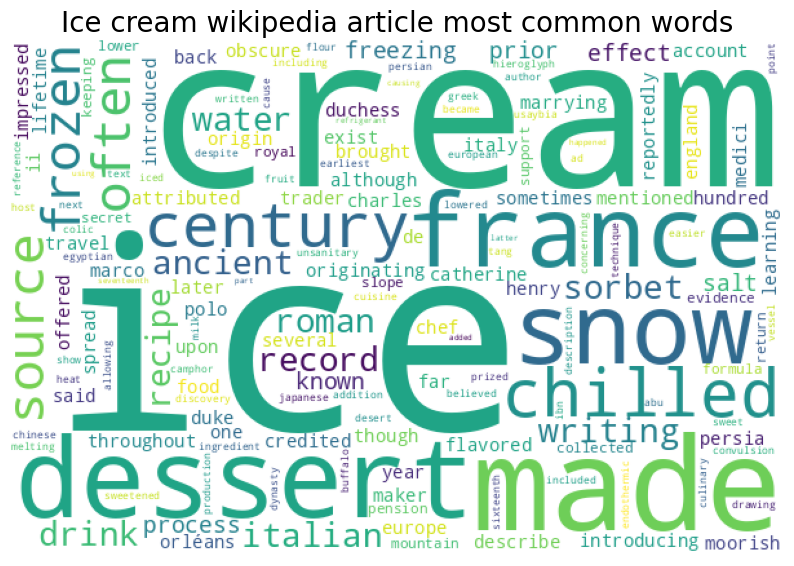

In [ ]:
def wordcloud(words, title):
  fig, ax = plt.subplots(figsize = (10, 8))
  wordcloud = WordCloud(background_color='white',
    width=600,
    height=400).generate(" ".join(words)) # it takes a list of strings as input

  ax.imshow(wordcloud)
  ax.axis('off')
  ax.set_title(title, fontsize=20);

wordcloud(cleaned_tokens, 'Ice cream wikipedia article most common words')

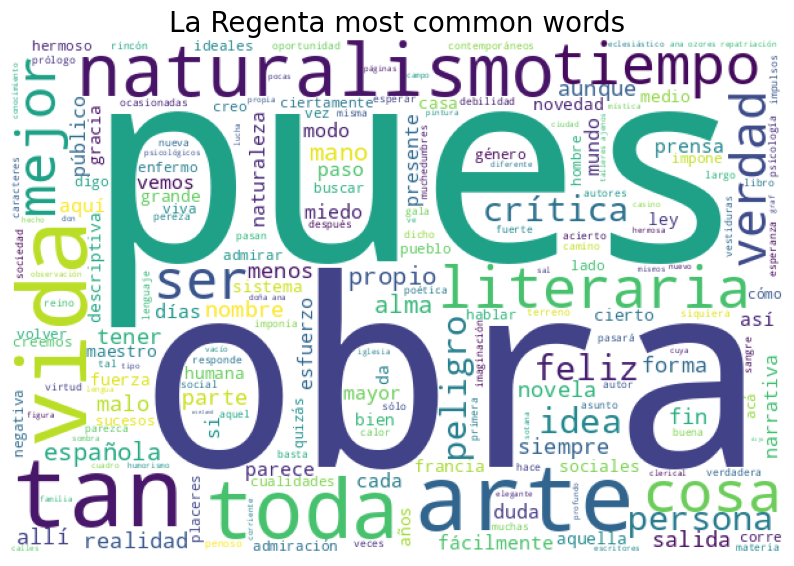

In [ ]:
wordcloud(cleaned_tokens_regenta, 'La Regenta most common words')

Aunque un wordcloud es visualmente muy atractivo no nos da los datos con exactitud. Para ver con más detalle cuál es la frecuencia de aparición de las palabras de un texto podemos usar un histograma de frecuencia. La biblioteca NLTK tiene un paquete (“FreqDist”) que nos puede ayudar a generar gráficos como este:

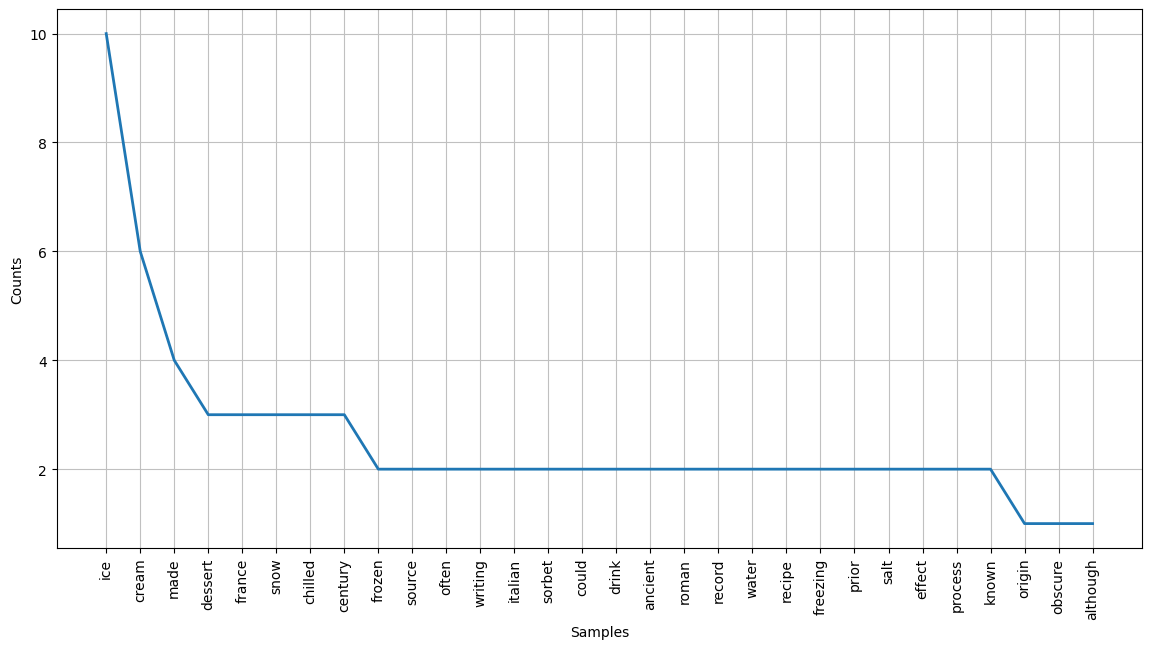

In [ ]:
def freq_hist_words(words):
  plt.figure(figsize=(14, 7)) # la medida del plot
  freqdist1 = FreqDist(words)
  freqdist1
  freqdist1.plot(30)

freq_hist_words(cleaned_tokens)

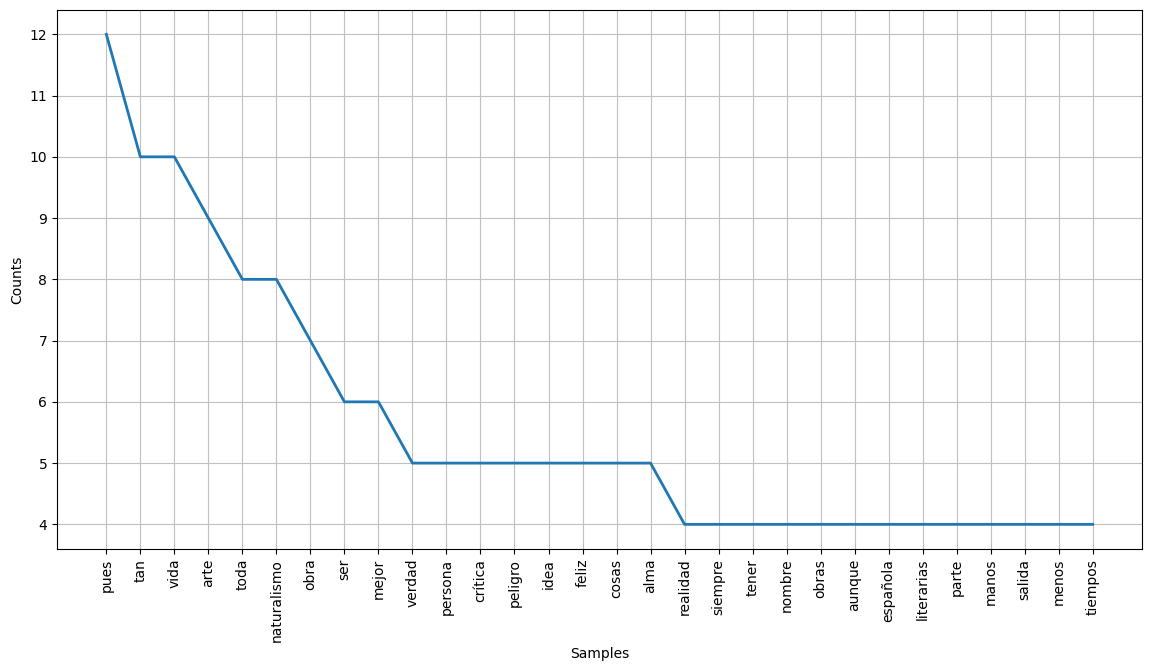

In [ ]:
freq_hist_words(cleaned_tokens_regenta)

Otra forma de obtener este tipo de gráfico es a partir de la función bar que genera un gráfico de barras sobre el resultado de FreqDist:

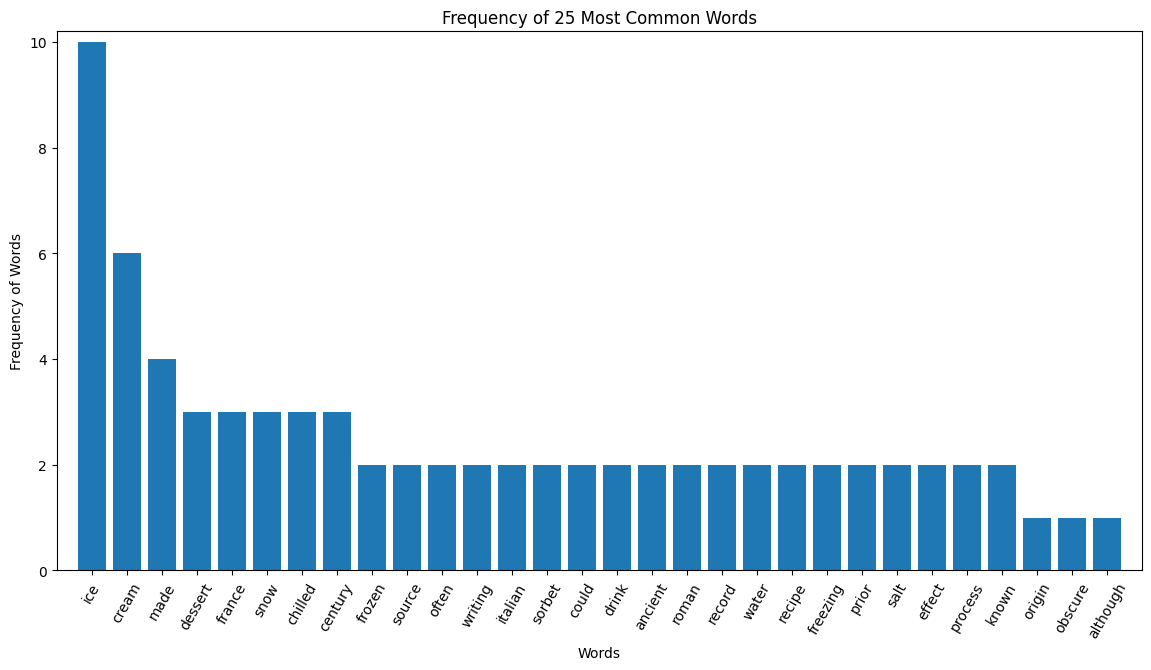

In [ ]:
def freq_bar_words(words):
  mostcommon_small = FreqDist(words).most_common(30)
  x, y = zip(*mostcommon_small)
  plt.figure(figsize=(14,7))
  plt.margins(0.02)
  plt.bar(x, y)
  plt.xlabel('Words')
  plt.ylabel('Frequency of Words')
  plt.xticks(rotation=60)
  plt.title('Frequency of 25 Most Common Words')
  plt.show()

freq_bar_words(cleaned_tokens)

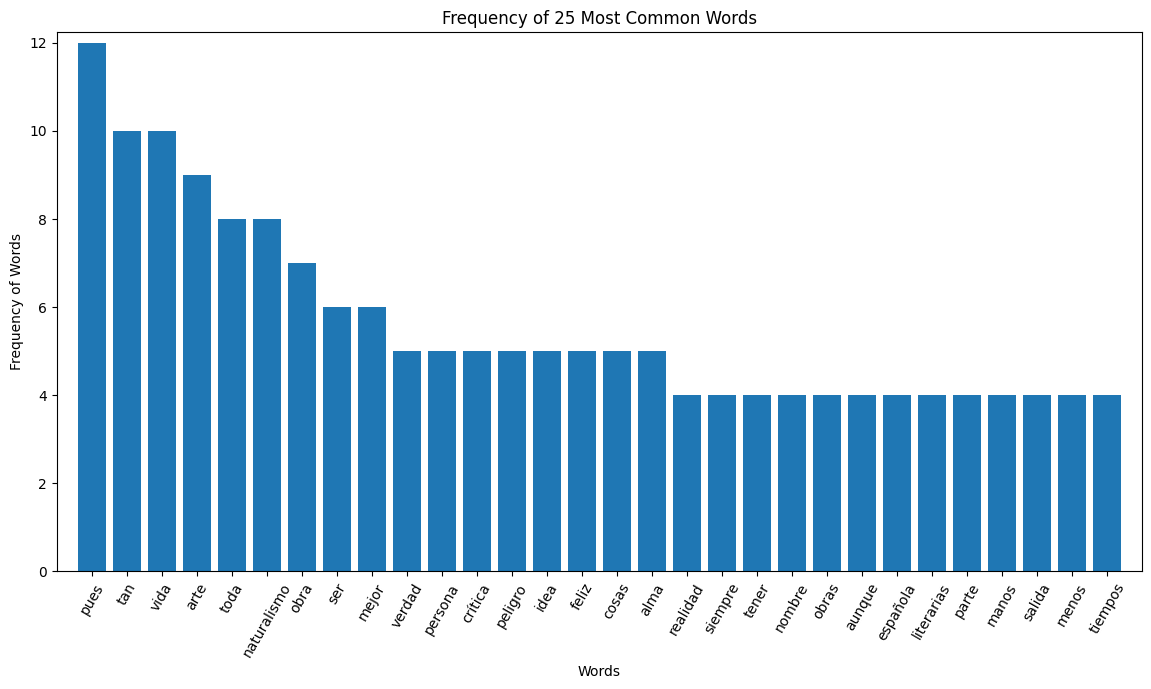

In [ ]:
freq_bar_words(cleaned_tokens_regenta)

# Vectorización de textos

Veremos cómo extraer características numéricas de un texto. Una vez tengamos el texto representado como un conjunto de datos numéricos, vamos a poder usar algoritmos de ML como los que ya hemos visto, pero aplicados a textos.

## One-hot

La primera forma que tenemos de representar un texto numéricamente es usando one-hot encoding. Recuerda que este método de codificación se usa para codificar variables categóricas y convertirlas en numéricas.

En este caso, la idea básica es la misma, pero las columnas corresponden a nuestro vocabulario (recuerda: la lista de todos los tokens válidos que aparecen en nuestro texto) y cada fila corresponde a una palabra de la frase o texto que queramos analizar.

Con One-hot, el texto se representará de la siguiente manera:

- Tantas filas y columnas como tokens tenemos
- Se rellenan los valores con ceros salvo el caso en el que coincida la fila del token con la columna

In [ ]:
import nltk
nltk.download('stopwords') # bajarlo la primera vez
nltk.download('wordnet') # bajarlo la primera vez
nltk.download('omw-1.4') # bajarlo la primera vez

import numpy as np
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Guardamos la frase de nuestro ejemplo sobre Serena Williams en una variable llamada sentence y vamos a obtener el listado de tokens limpios listos para trabajar.

In [ ]:
sentence="Serena Williams is considered one of the best tennis players in history."

clean_tokens = [WordNetLemmatizer().lemmatize(word).lower()
for word in TreebankWordTokenizer().tokenize(sentence)
  if word.lower() not in stopwords.words('english')
    and word.lower().isalpha()]

clean_tokens

['serena',
 'williams',
 'considered',
 'one',
 'best',
 'tennis',
 'player',
 'history']

Para poder generar la matriz de unos y ceros necesitamos conocer la dimensión del vector de tokens:

In [ ]:
num_tokens = len(set(clean_tokens))
num_tokens

8

Ordenamos el listado de palabras:

In [ ]:
vocab = sorted(set(clean_tokens))
vocab_size = len(vocab)
vocab_size

vocab

['best',
 'considered',
 'history',
 'one',
 'player',
 'serena',
 'tennis',
 'williams']

Creamos la matriz de ceros con la función zeros de la librería numpy y con un bucle for sobre el conjunto limpio de tokens vamos a rellenar los unos en las posiciones correspondientes.

In [ ]:
onehot = np.zeros((num_tokens, vocab_size), int)
for i, word in enumerate(clean_tokens):
  onehot[i, vocab.index(word)] = 1

onehot

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

Podemos hacer que el resultado sea más legible si visualizamos los resultados como un dataframe de pandas:

In [ ]:
# Lo hacemos más legible
pd.DataFrame(onehot, columns=vocab)

best  considered  history  one  player  serena  tennis  williams
0     0           0        0    0       0       1       0         0
1     0           0        0    0       0       0       0         1
2     0           1        0    0       0       0       0         0
3     0           0        0    1       0       0       0         0
4     1           0        0    0       0       0       0         0
5     0           0        0    0       0       0       1         0
6     0           0        0    0       1       0       0         0
7     0           0        1    0       0       0       0         0

## BoW

El siguiente método que vamos a aprender se llama Bag of Words (BOW). Con BOW podemos representar frases (o párrafos, textos…) con un solo vector. La idea es sumar los vectores representando cada una de las palabras, obtenidos previamente con one-hot encoding.

El resultado es un único vector de la longitud de nuestro vocabulario, y que en cada posición tiene el número de ocurrencias de cada palabra en la frase.

Empezamos definiendo un conjunto de frases y haciendo la transformación BoW con el método fit_transform de CountVectorizer.

In [ ]:
# let's vectorise a set of sentences
sentences = [
  'This is amazing!',
  'ML is the best, yes it is',
  'I am not sure about how this is going to end...'
]

count = CountVectorizer()
bag = count.fit_transform(sentences)
bag

<3x16 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

Podemos ver las palabras más frecuentes de nuestra transformación Bow:

In [ ]:
count.vocabulary_

{'this': 13,
 'is': 7,
 'amazing': 2,
 'ml': 9,
 'the': 12,
 'best': 3,
 'yes': 15,
 'it': 8,
 'am': 1,
 'not': 10,
 'sure': 11,
 'about': 0,
 'how': 6,
 'going': 5,
 'to': 14,
 'end': 4}

Otra funcionalidad muy interesante es la función que obtiene el listado de palabras:

In [ ]:
count.get_feature_names_out()

array(['about', 'am', 'amazing', 'best', 'end', 'going', 'how', 'is',
       'it', 'ml', 'not', 'sure', 'the', 'this', 'to', 'yes'],
      dtype=object)

Podemos visualizar el resultado de la siguiente manera:

In [ ]:
pd.DataFrame(bag.toarray(), columns=count.get_feature_names_out())

about  am  amazing  best  end  going  how  is  it  ml  not  sure  the  \
0      0   0        1     0    0      0    0   1   0   0    0     0    0   
1      0   0        0     1    0      0    0   2   1   1    0     0    1   
2      1   1        0     0    1      1    1   1   0   0    1     1    0   

   this  to  yes  
0     1   0    0  
1     0   0    1  
2     1   1    0

## TF-IDF

BOW significa un avance respecto a la transformación one-hot encoding, pero aún es **limitado**.

Una de sus principales limitaciones es que no es capaz de detectar qué palabras son más **relevantes** para el significado de una frase. Este método tiene en cuenta no solo la frecuencia de las palabras (como BOW), sino también su relevancia.

El primer componente del TF-IDF es el **TF** (Term Frequency). Esto no es nada más que el **BOW**, es decir, el número de veces que una palabra del vocabulario aparece en una frase. Es decir, para obtener el TD-IDF tenemos que obtener previamente la transformación BoW.

El segundo componente es el **IDF** (Inverse Document Frequency): es una medida de **cuánta información** da una palabra. Si la palabra es muy común en todo el texto, entonces se considera que da poca información. Si es poco frecuente, se considera que da más información, ya que allí donde aparezca es muy probable que la frase trate de lo que sea que esta palabra denota.

Crear una matriz de frecuencia de términos (es decir, obteniendo el BOW de cada frase):

In [ ]:
count = CountVectorizer()
bag = count.fit_transform(sentences)
count.vocabulary_

pd.DataFrame(bag.toarray(), columns=count.get_feature_names_out())

about  am  amazing  best  end  going  how  is  it  ml  not  sure  the  \
0      0   0        1     0    0      0    0   1   0   0    0     0    0   
1      0   0        0     1    0      0    0   2   1   1    0     0    1   
2      1   1        0     0    1      1    1   1   0   0    1     1    0   

   this  to  yes  
0     1   0    0  
1     0   0    1  
2     1   1    0

Calculamos el IDF de cada palabra. Observa que el IDF es el mismo para todas las frases, ya que es un concepto que es relativo a **todo el texto**, que en este caso consiste en 3 frases para medir la relevancia de forma global.

Empezamos inicializando el elemento IDF y definimos la precisión de los decimales a 2 cifras:

In [ ]:
tfidf_trans = TfidfTransformer(use_idf=True, smooth_idf=True)
np.set_printoptions(precision=2)

Le pasamos al elemento IDF la bolsa de palabras para hacer la transformación completa  y visualizamos el array de palabras:

In [ ]:
# Feed the tf-idf transformer with our previously created Bag of Words

# transform the sentence sample
tfidf = tfidf_trans.fit_transform(bag)
tfidf_array = tfidf.toarray()
tfidf_array

array([[0.  , 0.  , 0.72, 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.55, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.  , 0.47, 0.4 , 0.4 , 0.  ,
        0.  , 0.4 , 0.  , 0.  , 0.4 ],
       [0.33, 0.33, 0.  , 0.  , 0.33, 0.33, 0.33, 0.2 , 0.  , 0.  , 0.33,
        0.33, 0.  , 0.25, 0.33, 0.  ]])

Para que sea más legible el resultado usamos lo siguiente para acceder al elemento idf_. Como podéis ver, palabras como "is", que aparecen en todos los documentos, tienen una puntuación más baja que la que tienen palabras que sólo aparecen en un documento, como "amazing".

In [ ]:
pd.DataFrame(tfidf_trans.idf_.reshape(1, -1), columns=count.get_feature_names_out()).round(2)

about    am  amazing  best   end  going   how   is    it    ml   not  sure  \
0   1.69  1.69     1.69  1.69  1.69   1.69  1.69  1.0  1.69  1.69  1.69  1.69   

    the  this    to   yes  
0  1.69  1.29  1.69  1.69

Multiplicamos el TF de cada palabra en cada frase por su IDF y normalizamos, en este caso con la norma L2.

Notad que la puntuación final no es solo el resultado de multiplicar el TF con el IDF, sino también de normalizarlo, en este caso mediante la norma L2 (se pueden usar otros métodos). Esto hace que la misma palabra tenga distintos TF-IDF en diferentes frases, ya que la normalización depende de la longitud de las frases.

In [ ]:
pd.DataFrame(tfidf_array, columns=count.get_feature_names_out()).round(2)

about    am  amazing  best   end  going   how    is   it   ml   not  sure  \
0   0.00  0.00     0.72   0.0  0.00   0.00  0.00  0.43  0.0  0.0  0.00  0.00   
1   0.00  0.00     0.00   0.4  0.00   0.00  0.00  0.47  0.4  0.4  0.00  0.00   
2   0.33  0.33     0.00   0.0  0.33   0.33  0.33  0.20  0.0  0.0  0.33  0.33   

   the  this    to  yes  
0  0.0  0.55  0.00  0.0  
1  0.4  0.00  0.00  0.4  
2  0.0  0.25  0.33  0.0

**Práctica. TF-IDF con Vectorizer**

Empezamos definiendo un nuevo conjunto de frases:

In [ ]:
sentences=["I love natural language processing, but I hate python",
  "I like image processing",
  "I like signal processing and image processing"]

Aplicamos el TD-IDF de sklearn indicando las stopwords del idioma anglosajón. Visualizamos rápidamente la dimensión del resultado.

In [ ]:
tfdif_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = tfdif_vectorizer.fit_transform(sentences)
tfidf.shape

(3, 9)

Podemos analizar el resultado con el siguiente comando:

In [ ]:
pd.DataFrame(tfidf.toarray(), columns=tfdif_vectorizer.get_feature_names_out())

hate     image  language      like      love   natural  processing  \
0  0.432385  0.000000  0.432385  0.000000  0.432385  0.432385    0.255374   
1  0.000000  0.619805  0.000000  0.619805  0.000000  0.000000    0.481334   
2  0.000000  0.403525  0.000000  0.403525  0.000000  0.000000    0.626747   

     python    signal  
0  0.432385  0.000000  
1  0.000000  0.000000  
2  0.000000  0.530587

**Aplicación: Similaridad de textos**

Una de las cosas interesantes que podemos hacer con vectores es calcular la **similaridad** entre distintas frases.

La similaridad, de hecho, es entre los vectores que representan cada frase, pero la podemos interpretar hasta cierto punto como similaridad de significado de las frases que representan estos vectores.

Pero, ¿por qué es interesante saber la similaridad entre textos/frases? Puede ser útil para, entre otras cosas:

- Encontrar los documentos más similares a una “query” (esto es lo que hacen algunos motores de búsqueda).
- Para encontrar documentos similares a otro documento. Esto nos puede servir para crear un recomendador basado en contenido textual.
- Para encontrar la mejor expresión para etiquetar un documento.

Esto es útil porque nos permite comparar frases que, aunque sean muy distintas respecto a su longitud, son muy parecidas en cuanto a significado.

La similaridad del coseno está comprendida entre -1 y 1:

- 1: máxima similaridad
- 0: **ninguna** relación
- 1: significados totalmente opuestos.

Vamos a ver de forma práctica la forma de obtener la similitud entre textos con la transformación TF-IDF.

Empezamos definiendo un conjunto de frases:

In [ ]:
sentences_2 = ["I love natural language processing, but I hate python",
  "I like image processing",
  "I like signal processing and image processing",
  "Our cat eats too much",
  "Natural language processing is difficult",
  "The neighbour's cat is called Gato",
  "I don't care about signal processing"]

Inicializamos el transformador TF-IDF y vamos a incluir unas marcas temporales, start y end, para medir el tiempo que tarda.

In [ ]:
start = time.time() #calculamos cuánto se tarda en crear los vectores

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sentences_2)

end = time.time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 0.0032722949981689453 sec to fit and transform all documents.


Vamos a crear un dataframe con el diccionario de nuestros datos:

In [ ]:
tfidf_dict = vectorizer.vocabulary_
df_tf_idf_voc = pd.DataFrame({'column_name': list(tfidf_dict.keys()),
  'column_index': list(tfidf_dict.values())})
df_tf_idf_voc = df_tf_idf_voc.sort_values(by='column_index')

df_tfidf = pd.DataFrame(X_tfidf.toarray())
df_tfidf.columns = df_tf_idf_voc['column_name'].tolist()

df_tfidf

about       and       but    called     care       cat  difficult  \
0  0.00000  0.000000  0.419988  0.000000  0.00000  0.000000   0.000000   
1  0.00000  0.000000  0.000000  0.000000  0.00000  0.000000   0.000000   
2  0.00000  0.486109  0.000000  0.000000  0.00000  0.000000   0.000000   
3  0.00000  0.000000  0.000000  0.000000  0.00000  0.383337   0.000000   
4  0.00000  0.000000  0.000000  0.000000  0.00000  0.000000   0.545682   
5  0.00000  0.000000  0.000000  0.431207  0.00000  0.357939   0.000000   
6  0.50124  0.000000  0.000000  0.000000  0.50124  0.000000   0.000000   

       don      eats      gato  ...      love      much   natural  neighbour  \
0  0.00000  0.000000  0.000000  ...  0.419988  0.000000  0.348626   0.000000   
1  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.000000   
2  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.000000   
3  0.00000  0.461804  0.000000  ...  0.000000  0.461804  0.000000   0.000000   
4  0.00000  0.000000  0.000000  ...  0.000000  0.000000  0.452963   0.000000   
5  0.00000  0.000000  0.431207  ...  0.000000  0.000000  0.000000   0.431207   
6  0.50124  0.000000  0.000000  ...  0.000000  0.000000  0.000000   0.000000   

        our  processing    python    signal       the       too  
0  0.000000    0.226632  0.419988  0.000000  0.000000  0.000000  
1  0.000000    0.417658  0.000000  0.000000  0.000000  0.000000  
2  0.000000    0.524624  0.000000  0.403512  0.000000  0.000000  
3  0.461804    0.000000  0.000000  0.000000  0.000000  0.461804  
4  0.000000    0.294458  0.000000  0.000000  0.000000  0.000000  
5  0.000000    0.000000  0.000000  0.000000  0.431207  0.000000  
6  0.000000    0.270477  0.000000  0.416073  0.000000  0.000000  

[7 rows x 25 columns]

Generamos una nube de palabras para ver las palabras más frecuentes de nuestro conjunto:

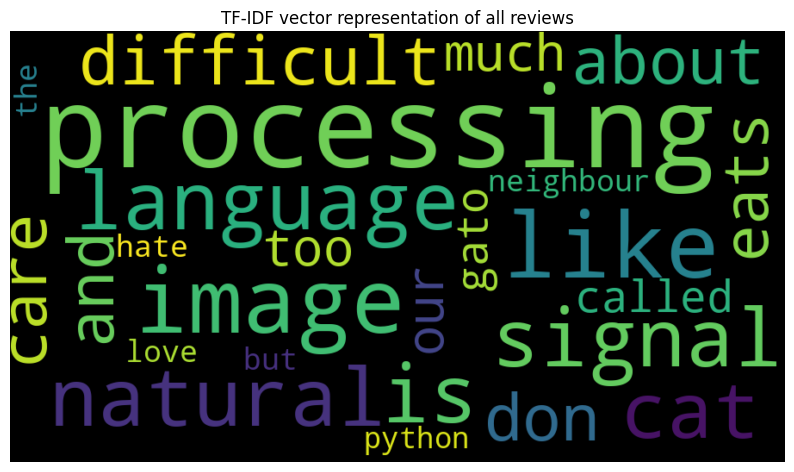

In [ ]:
def visualize_wordcloud_dict_frequencies(dict_freqs, title, relative_scaling=0.5, max_words=100,
  background_color='black'):
  plt.figure(figsize=(10, 10))
  wordcloud = WordCloud(width=900, height=500, max_words=max_words, relative_scaling=relative_scaling,
    normalize_plurals=False, background_color=background_color).generate_from_frequencies(
    dict_freqs)
  plt.title(title)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

title="TF-IDF vector representation of all reviews"
d_freq_tfidf = df_tfidf.sum().to_dict()
visualize_wordcloud_dict_frequencies(d_freq_tfidf, title, relative_scaling=0.5, max_words=500,
  background_color='black')

Y ahora, estamos en disposición de buscar las frases más similares a otras. Para ello, seleccionamos la tercera de nuestro listado.

In [ ]:
# Vamos a buscar las frases más parecidas a:
sentences_2[2]

'I like signal processing and image processing'

Y vamos a obtener la distancia del coseno de nuestra frase respecto al resto de elementos:

In [ ]:
reference_review_matrix = np.expand_dims(np.array(df_tfidf.iloc[2].values), axis=0)
distances_to_reference_review = cosine_similarity(reference_review_matrix, X_tfidf)

Juntamos las frases y las distancias obtenidas en un único conjunto de datos para visualizar los resultados de una forma más sencilla.

In [ ]:
df = pd.DataFrame(sentences_2,columns=["Sentence"])

df["Distance"] = distances_to_reference_review.transpose()
df

Sentence  Distance
0  I love natural language processing, but I hate...  0.118897
1                            I like image processing  0.737611
2      I like signal processing and image processing  1.000000
3                              Our cat eats too much  0.000000
4           Natural language processing is difficult  0.154480
5                 The neighbour's cat is called Gato  0.000000
6               I don't care about signal processing  0.309789

# Information Extraction

Cuando hablamos de extracción de información nos referimos simplemente a esto: extraer información relevante de un texto que, por definición, es un conjunto de datos no estructurado.

Un ejemplo de extracción de información es cuando nuestro servidor de correo electrónico detecta que hemos dicho en el correo que adjuntamos un archivo y nos avisa si nos hemos olvidado de adjuntarlo.

Aquí nos fijamos en otras dos tareas:

- Etiquetado gramatical (“part-of-speech tagging”)
- Named Entity Recognition (NER).

La primera consiste en etiquetar nuestro texto con la función **gramatical** de cada palabra: nombre, adjetivo, verbo, adverbio, preposición, etc. La segunda consiste en detectar **entidades** importantes que son nombradas en el texto, como por ejemplo, personas, lugares, empresas, cantidades, números de teléfono, etcétera.

## Part-of-speech tagging

El objetivo del Etiquetado Gramatical es **detectar la función gramatical** de cada palabra de un texto. Este paso es esencial para muchas otras tareas de NLP y muy a menudo forma parte del NLP pipeline.

Por ejemplo, la lematización a menudo requiere de un Etiquetado Gramatical previo. ¿Por qué? Considerad la palabra “well”. Esta palabra es **ambigua**, es decir, tiene más de un significado. En un sentido, significa “bien” (“She works really well”). En otro, significa “pozo” (“The cat fell in the well”). En el primer caso, un lemmatizer adecuado tendría que reducir la palabra a “good” y en el segundo, dejarla en “well”.

¿Cómo podemos conseguir esto? Por medio del etiquetado gramatical, ya que en el primer caso, “well” funciona como **adverbio** y, en el segundo, como **nombre**. Esta información nos permitiría aplicar diferentes normas de lematización a las distintas ocurrencias de la palabra.

Otra aplicación es en la limpieza inicial de nuestros textos. Igual que a menudo eliminamos stopwords del texto porque aportan poca información y nos suponen un coste computacional, también podemos considerar en ciertos casos que las conjunciones (“y”, “pero”, etc) o las preposiciones (“a”, “para”, “con”, etc) no nos proporcionan mucha información y no vale la pena mantenerlas. Una manera de eliminarlas es identificar todas las palabras de esta clase por medio del Etiquetado Gramatical.

Otro uso del Etiquetado Gramatical es en la extracción de **relaciones**. Por ejemplo, puede que estemos interesados en extraer relaciones entre **sujetos y predicados**: quién compró qué, qué se fundó cuándo, quién es la hermana de quién. Una manera de conseguir esto es mediante el Etiquetado Gramatical, ya que éste nos permite buscar estructuras de funciones. En este caso estaríamos interesados en la secuencia: NOMBRE – VERBO – NOMBRE

Empezamos instalando e importando todas las librerías necesarias. No te sientas abrumado por el tamaño de esta celda:

In [ ]:
import nltk
nltk.download('punkt') # bajar la primera vez
nltk.download('averaged_perceptron_tagger') # bajar la primera vez
nltk.download('tagsets') # bajar la primera vez
nltk.download('universal_tagset') # bajar la primera vez
!python -m spacy download en_core_web_sm # bajar la primera vez
!python -m spacy download es_core_news_sm # bajar la primera vez
nltk.download('wordnet') # bajar la primera vez
nltk.download('omw-1.4') # bajar la primera vez
nltk.download('stopwords') # bajar la primera vez

from bs4 import BeautifulSoup
import requests
import re
import nltk
from nltk import word_tokenize
import spacy
import spacy
from spacy import displacy
from collections import Counter
import es_core_news_sm
import en_core_web_sm

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import TreebankWordTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


2023-07-02 02:53:35.696091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-07-02 02:53:50.551452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 28.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vamos a probar el etiquetado gramatical que viene en NLTK por defecto con dos breves frases.

Fijaros que el sistema de etiquetado es capaz de reconocer que “ski” es, en su primera aparición, un verbo y en la segunda, un adjetivo. Esta capacidad de distinción según el contexto puede ser útil para un sistema de texto-a-voz (como un asistente de voz) ya que palabras que se escriben igual, a veces se pronuncian diferente en función de su rol gramatical.

| Tag           | Meaning                   | English Examples                                 |
| ---------------------|----------------------------------|---------------------------------------------|
ADJ | adjective | new, good, high, special, big, local |
ADP | adposition | on, of, at, with, by, into, under |
ADV | adverb | really, already, still, early, now |
CONJ | conjunction | and, or, but, if, while, although
DET | determiner, article | the, a, some, most, every, no, which |
NOUN | noun | year, home, costs, time, Africa |
NUM | numeral | twenty-four, fourth, 1991, 14:24 |
PRT | particle | at, on, out, over per, that, up, with |
PRON | pronoun | he, their, her, its, my, I, us |
VERB | verb | is, say, told, given, playing, would |
• | punctuation marks | .,;! |
X | other | ersatz, esprit, dunno, gr8, univeristy |

In [ ]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [ ]:
text = word_tokenize("During Winter, I go to ski to the ski resort.")
nltk.pos_tag(text)

[('During', 'IN'),
 ('Winter', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('go', 'VBP'),
 ('to', 'TO'),
 ('ski', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('ski', 'JJ'),
 ('resort', 'NN'),
 ('.', '.')]

Podemos acceder a la información de NLTK sobre cada una de las etiquetas:

In [ ]:
#con el método .help podemos pedir información sobre las diferentes etiquetas del conjunto de etiquetas de Penn Treebank, que es el que usa .pos_tag() por defecto.
print(nltk.help.upenn_tagset('JJ'))
print(nltk.help.upenn_tagset('NN'))

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None


También se puede usar un conjunto de etiquetas simplificado, llamado “Universal” si definimos tagset='universal'

In [ ]:
text = word_tokenize("During Winter, I go to ski to the ski resort.")
nltk.pos_tag(text, tagset='universal')

[('During', 'ADP'),
 ('Winter', 'NOUN'),
 (',', '.'),
 ('I', 'PRON'),
 ('go', 'VERB'),
 ('to', 'PRT'),
 ('ski', 'VERB'),
 ('to', 'PRT'),
 ('the', 'DET'),
 ('ski', 'ADJ'),
 ('resort', 'NOUN'),
 ('.', '.')]

La biblioteca Spacy también ofrece Etiquetado Gramatical. En el siguiente ejemplo, podemos ver dos niveles de etiquetado así como una etiqueta de función sintáctica:

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
  print(token.text, token.pos_, token.tag_, token.dep_)

Apple PROPN NNP nsubj
is AUX VBZ aux
looking VERB VBG ROOT
at ADP IN prep
buying VERB VBG pcomp
U.K. PROPN NNP dobj
startup NOUN NN dep
for ADP IN prep
$ SYM $ quantmod
1 NUM CD compound
billion NUM CD pobj


Para obtener más detalles sobre las etiquetas:

In [ ]:
#podemos obtener más información sobre cada etiqueta con el método .explain()
spacy.explain('nsubj')

'nominal subject'

## Named Entity recognition

Named Entity Recognition es la tarea de identificar entidades importantes en un texto y clasificarlas según su tipo. Por ejemplo, personas, organizaciones, sitios, fechas, cantidades, precios, porcentajes, etc.

Una de las primeras cosas que tenemos que hacer con Spacy es cargar el modelo con el que vamos a trabajar. Observa a continuación que podemos cargar el modelo de distintos idiomas:

In [ ]:
nlp_sp = es_core_news_sm.load()
nlp_sp

In [ ]:
nlp = en_core_web_sm.load()
nlp

Para este ejemplo vamos a descargar un artículo de wikipedia usando la librería BeautifulSoup y vamos a hacer una limpieza inicial del contenido con la función url_to_string que definimos a continuación.

In [ ]:
# Esta vez vamos a bajarnos el texto de una url con la ayuda de BeautifulSoup, una biblioteca que se usa para hacer web scraping.
def url_to_string(url):
  res = requests.get(url)
  html = res.text
  soup = BeautifulSoup(html, 'html5lib')

  for script in soup(["script", "style", 'aside']):
    script.extract()
  return " ".join(re.split(r'[\n\t]+', soup.get_text()))

my_url = 'https://en.wikipedia.org/wiki/Hurricane_Sergio_(2018)'
wiki_text = url_to_string(my_url)
wiki_text

' Hurricane Sergio (2018) - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload file Languages Language links are at the top of the page across from the title. Search Search Create accountLog in Personal tools  Create account Log in Pages for logged out editors learn more ContributionsTalk Contents move to sidebar hide (Top) 1Meteorological history 2Preparations and impact Toggle Preparations and impact subsection 2.1Mexico 2.2United States 3See also 4Notes 5References 6External links Toggle the table of contents Toggle the table of contents Hurricane Sergio (2018) 5 languages العربيةفارسیKurdîPortuguês中文 Edit links Article Talk English Read Edit View history Tools Tools move to sidebar hide Actions ReadEditView history General What links hereRelated changesUpload fileSpecial pagesPermanent linkPage informationCite this 

Aplicamos el modelo de Spacy al texto de la wikipedia y podemos observar la diferencia entre la variable original (una cadena de texto) y el resultado que nos ofrece Spacy (un conjunto de tokens).

In [ ]:
article = nlp(wiki_text)
print(type(wiki_text), type(article))

<class 'str'> <class 'spacy.tokens.doc.Doc'>


De esta manera podemos acceder a los distintos elementos que nos ofrece Spacy, como las entidades que identifica:

In [ ]:
article.ents

(Hurricane Sergio,
 2018,
 Main,
 Navigation Main,
 WikipediaContact,
 Contribute HelpLearn,
 Languages Language,
 ContributionsTalk Contents,
 2Preparations,
 Toggle Preparations,
 2.2United,
 3See,
 6External,
 Toggle,
 Toggle,
 Hurricane Sergio,
 2018,
 5,
 العربيةفارسیKurdîPortuguês中文 Edit,
 Talk English Read Edit View,
 Print,
 Download as PDFPrintable,
 Wikimedia Commons,
 Wikipedia,
 Category 4 Pacific,
 Hurricane Sergio Hurricane Sergio,
 October 4Meteorological,
 29,
 2018DissipatedOctober 13,
 4,
 hurricane1-minute,
 SSHWS/NWS)Highest,
 220 km,
 hPa,
 27.82,
 California,
 Northwestern Mexico,
 Southwestern United States,
 TexasIBTrACS,
 1]Part,
 2018,
 Hurricane Sergio,
 Texas,
 early October 2018,
 Sergio,
 eighth,
 Category 4,
 the East Pacific,
 2018,
 seven,
 2015,
 twentieth,
 ninth,
 South America,
 September 24,
 The National Hurricane Center,
 several days,
 September 29,
 Sergio,
 the next couple of days,
 October 2,
 October 4,
 140 mph,
 230 km,
 12 hours,
 second,

O podemos construir un bucle for para obtener el tipo de entidad de cada una. Aunque esta visualización no parece muy eficiente.

In [ ]:
for item in article:
  if item.ent_type_:
    print(item, item.ent_type_)
    print('-----')

Hurricane EVENT
-----
Sergio EVENT
-----
2018 DATE
-----
Main PRODUCT
-----
Navigation ORG
-----
Main ORG
-----
WikipediaContact ORG
-----
Contribute PERSON
-----
HelpLearn PERSON
-----
Languages LOC
-----
Language LOC
-----
ContributionsTalk PRODUCT
-----
Contents PRODUCT
-----
2Preparations CARDINAL
-----
Toggle ORG
-----
Preparations ORG
-----
2.2United CARDINAL
-----
3See CARDINAL
-----
6External CARDINAL
-----
Toggle ORG
-----
Toggle ORG
-----
Hurricane EVENT
-----
Sergio EVENT
-----
2018 DATE
-----
5 CARDINAL
-----
العربيةفارسیKurdîPortuguês中文 FAC
-----
Edit FAC
-----
Talk WORK_OF_ART
-----
English WORK_OF_ART
-----
Read WORK_OF_ART
-----
Edit WORK_OF_ART
-----
View WORK_OF_ART
-----
Print GPE
-----
Download ORG
-----
as ORG
-----
PDFPrintable ORG
-----
Wikimedia FAC
-----
Commons FAC
-----
Wikipedia GPE
-----
Category LAW
-----
4 LAW
-----
Pacific LAW
-----
Hurricane EVENT
-----
Sergio EVENT
-----
Hurricane EVENT
-----
Sergio EVENT
-----
October DATE
-----
4Meteorological DATE
-

Por ello, podemos usar la función Counter que nos mostrará las entidades más frecuentes:

In [ ]:
#miramos cuáles son las entidades más mencionadas del artículo
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Sergio', 40),
 ('National Centers for Environmental Information', 28),
 ('April 13, 2020', 23)]

Vamos a construir un elemento con las distintas frases que conforman el artículo que hemos descargado para preparar la visualización que hemos visto, accediendo al elemento sents:

In [ ]:
sentences = [x for x in article.sents]
print(sentences[0:5])

[ Hurricane Sergio (2018) - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload file Languages Language links are at the top of the page across from the title., Search Search Create accountLog in Personal tools  Create account Log in Pages for logged out editors learn more ContributionsTalk Contents move to sidebar hide (Top) 1Meteorological history 2Preparations and impact Toggle Preparations and impact subsection 2.1Mexico 2.2United States 3See also 4Notes 5References 6External links Toggle the table of contents Toggle the table of contents Hurricane Sergio (2018) 5 languages العربيةفارسیKurdîPortuguês中文 Edit links Article Talk English Read Edit View history Tools Tools move to sidebar hide Actions ReadEditView, history General, What links hereRelated changesUpload fileSpecial pagesPermanent linkPage, informationCite t

Finalmente, podemos visualizar el resultado:

In [ ]:
#Spacy nos permite visualizar el etiquetado.
displacy.render(nlp(str(sentences[0:5])), jupyter=True, style='ent')

**Aplicación: Anonimización**

Una de las aplicaciones del Named Entity Recognition es la **anonimización** de documentos.

La **anonimización** de documentos es un tipo de limpieza que se lleva a cabo para proteger la privacidad de personas, organizaciones u otras entidades. Por ejemplo, no es extraño anonimizar ciertos campos de los currículums de candidatos a un puesto de trabajo. El objetivo es evitar cualquier tipo de **discriminación**, por ejemplo, por razones de género o etnia.

Supongamos que tenemos el curriculum vitae de un candidato:

In [ ]:
cv="""
Elena Depardon
67 Cecil Street, Glasgow (UK)
elena.depardon@protonmail.edu
797049765

Professional experience

English Teacher
Sol Academy (Glasgow, UK), 2020-currently

Education

MA in English Teaching
University of Leeds, 2018-2020

BA in Education
University of Glasgow, 2014-2018
"""

Le aplicamos el modelo de Spacy para el idioma anglosajón y mostramos con el bucle for que hemos antes para cada entidad que identifica la palabra y el tipo de entidad:

In [ ]:
curriculum = nlp(cv)

for item in curriculum:
  if item.ent_type_:
    print(item, item.ent_type_)
    print('-----')

Elena PERSON
-----
Depardon PERSON
-----
67 CARDINAL
-----
Cecil LOC
-----
Street LOC
-----
Glasgow PERSON
-----
UK GPE
-----
797049765 DATE
-----
English LANGUAGE
-----
Sol PERSON
-----
Academy PERSON
-----
Glasgow GPE
-----
UK GPE
-----
2020 DATE
-----
English LANGUAGE
-----
University ORG
-----
of ORG
-----
Leeds ORG
-----
2018 DATE
-----
- DATE
-----
2020 DATE
-----
Education ORG
-----
University ORG
-----
of ORG
-----
Glasgow ORG
-----
2014 DATE
-----
- DATE
-----
2018 DATE
-----


Nos puede resultar de utilidad el comando explain de Spacy para que nos muestre el detalle de alguna entidad:

In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

Otra utilidad muy interesante y que nos puede facilitar el trabajo en nuestro día a día son las funciones like_email o like_num, observa el resultado a continuación de ambas:

In [ ]:
[token.text for token in curriculum if token.like_email]

['elena.depardon@protonmail.edu']

In [ ]:
[token.text for token in curriculum if token.like_num]

['67', '797049765', '2020', '2018', '2020', '2014', '2018']

Podemos usar una estructura similar para filtrar por distintos tipos de entidades:

In [ ]:
[token.text for token in curriculum if token.ent_type_=='PERSON']

['Elena', 'Depardon', 'Glasgow', 'Sol', 'Academy']

In [ ]:
[token.text for token in curriculum if token.ent_type_=='LOC']

['Cecil', 'Street']

In [ ]:
[token.text for token in curriculum if token.ent_type_=='GPE']

['UK', 'Glasgow', 'UK']

De esta forma podemos construir un listado de tokens a eliminar de nuestro texto combinando distintas condiciones:

In [ ]:
to_remove=[(token.text, token.ent_type_) for token in curriculum if token.ent_type_=='PERSON' or
  token.ent_type_=='LOC' or
  token.ent_type_=='GPE']
to_remove

emails=[(token.text, 'email') for token in curriculum if token.like_email]
numbers=[(token.text, 'number') for token in curriculum if token.like_num]

to_remove += emails
to_remove += numbers
to_remove

[('Elena', 'PERSON'),
 ('Depardon', 'PERSON'),
 ('Cecil', 'LOC'),
 ('Street', 'LOC'),
 ('Glasgow', 'PERSON'),
 ('UK', 'GPE'),
 ('Sol', 'PERSON'),
 ('Academy', 'PERSON'),
 ('Glasgow', 'GPE'),
 ('UK', 'GPE'),
 ('elena.depardon@protonmail.edu', 'email'),
 ('67', 'number'),
 ('797049765', 'number'),
 ('2020', 'number'),
 ('2018', 'number'),
 ('2020', 'number'),
 ('2014', 'number'),
 ('2018', 'number')]

A continuación con la función replace podemos ir sustituyendo cada uno de estos elementos para eliminar la información sensible:

In [ ]:
#cv = cv.replace("\n", " ")
for pair in to_remove:
  cv = cv.replace(pair[0], pair[1])

print(cv)


PERSON PERSON
number LOC LOC, PERSON (GPE)
email
number 

Professional experience

English Teacher
PERSON PERSON (PERSON, GPE), number-currently

Education

MA in English Teaching
University of Leeds, number-number

BA in Education
University of PERSON, number-number



# Topic modeling

El tema de esta sección es una de las tareas centrales de NLP no supervisadas: el topic modeling o modelado de temas.

El objetivo del “topic modeling” es **identificar los principales temas** sobre los que trata un texto. Se basa en la premisa de que los textos se pueden representar como un **conjunto de temas**  o “topics”, los cuales, a su vez, se pueden representar como **distribuciones** de probabilidad sobre las ocurrencias de palabras.

Es decir, un **tema** no es nada más que un **conjunto** de **palabras** que llevan asociadas una **probabilidad**.

**Latent Dirichlet Allocation**

Uno de los métodos más usados para hacer “topic modeling” se llama Latent Dirichlet Allocation o LDA.

Vamos a ver a grandes rasgos su funcionamiento. En primer lugar, elegimos un **número** K de temas a detectar. Este número lo elegimos en función de cuántos **temas anticipamos** que pueden estar presentes en los documentos. Si no estamos seguros, podemos probar todo el proceso con **distintos** K y evaluar los distintos resultados. Recuerda que encontrar el valor K adecuado no siempre es fácil y puede ser necesario que se trabaje con equipos de negocio que cuenten con conocimiento experto que nos ayuden a refinar los temas que se obtienen.

Un aspecto interesante del “topic modeling” es que las palabras polisémicas pueden formar parte de distintos temas, lo cual nos puede ayudar a distinguir sus distintos significados.

Una palabra como “banco” es polisémica, es decir, puede tener distintos significados dependiendo del **contexto** en el que aparezca. Por ejemplo:

- “He ido al banco a sacar dinero”, se refiere a una entidad bancaria.
- “Marina está leyendo en un banco de la plaza”, se refiere a un elemento de mobiliario urbano.

Lo importante es que no hay nada en el diseño del Latent Dirichlet Allocation que impida a una misma palabra aparecer en varios temas. De esta manera, si en nuestros documentos hubiera un tema sobre finanzas y un tema sobre urbanismo, la palabra “banco” podría aparecer en estos dos temas y eso nos permitiría distinguir en qué documentos se usa con un significado y en qué documentos se usa con el otro.

In [ ]:
import re
import time
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

import nltk
nltk.download('stopwords') # bajar la primera vez

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

!pip install pyLDAvis # instalar la primera vez
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vamos a leer los datos del CSV y vamos a visualizar los primeros 5 resultados:

In [ ]:
data = pd.read_csv('uci-news-aggregator.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PUBLISHER  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  CATEGORY                          STORY             HOSTNAME      TIMESTAMP  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1394470370698  
1        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM     www.livemint.com  1394470371207  
2        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com  1394470371550  
3        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM  www.ifamagazine.com  1394470371793  
4        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM    www.moneynews.com  1394470372027

In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(422419, 8)

Vamos a realizar un análisis rápido, para entender el problema. En primer lugar vamos a obtener el número de documentos que pertenece a cada clase, bien con un conteo.

In [ ]:
data.groupby("CATEGORY")['ID'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CATEGORY
b    115967
e    152469
m     45639
t    108344
Name: ID, dtype: int64

O con un gráfico de barras:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='CATEGORY'>

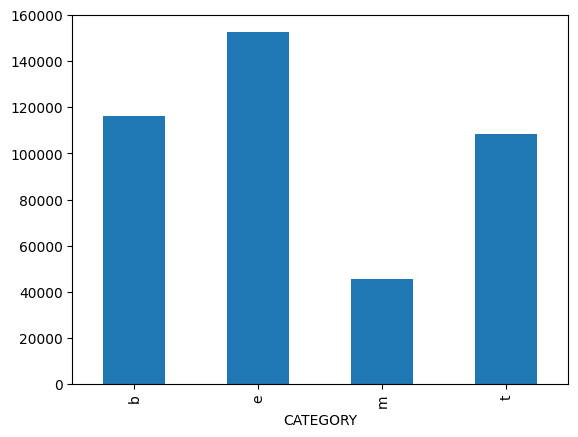

In [ ]:
data.groupby("CATEGORY")['ID'].count().plot.bar()
#ploteamos cuántos titulares hay de cada categoría

In [ ]:
data.TITLE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         Fed official says weak data caused by weather,...
1         Fed's Charles Plosser sees high bar for change...
2         US open: Stocks fall after Fed official hints ...
3         Fed risks falling 'behind the curve', Charles ...
4         Fed's Plosser: Nasty Weather Has Curbed Job Gr...
                                ...                        
422414    Surgeons to remove 4-year-old's rib to rebuild...
422415    Boy to have surgery on esophagus after battery...
422416    Child who swallowed battery to have reconstruc...
422417    Phoenix boy undergoes surgery to repair throat...
422418    Phoenix boy undergoes surgery to repair throat...
Name: TITLE, Length: 422419, dtype: object

Como nuestro dataset es muy grande vamos a hacer una muestra aleatoria de 1000 registros de cada tema. Observa que definimos el valor de random_state para que en distintas ejecuciones obtengamos siempre los mismos resultados. Combinamos todos los conjuntos de datos con el comando concat de pandas y nos quedamos con las columnas TITLE y CATEGORY.

In [ ]:
business = data[data["CATEGORY"] == "b"].sample(n=1000, random_state=1)
tech = data[data["CATEGORY"] == "t"].sample(n=1000, random_state=1)
entert = data[data["CATEGORY"] == "e"].sample(n=1000, random_state=1)
health = data[data["CATEGORY"] == "m"].sample(n=1000, random_state=1)

news = pd.concat([business, tech, entert, health])[['TITLE', 'CATEGORY']]
news.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TITLE CATEGORY
301850  Live Blog Fed stays the course on interest rat...        b
140864      Hyundai ix25 concept previews new compact SUV        b
282189  Amaya buying PokerStars, Full Tilt owner for $...        b
4640    American Eagle Outfitters Shares Lower on Fore...        b
175836                    Gas prices should hit peak soon        b

In [ ]:
news.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4000, 2)

In [ ]:
news.groupby("CATEGORY").count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TITLE
CATEGORY       
b          1000
e          1000
m          1000
t          1000

Recuerda que la primera tarea era hacer una limpieza sobre las palabras que componen nuestros datos. Para ello, creamos una función que vamos a aplicar con una función lambda que se encarga de separar las frases en palabras y se quedará con aquellas palabras formadas por letras y que no sean stopwords. Guardamos el resultado en la variable TITLE_clean.

In [ ]:
def clean_text(review):
  words = review.split()
  words = [word.lower() for word in words if (word.isalpha() and word not in stop_words)]
  return (" ").join(words)

news["TITLE_clean"] = news["TITLE"].map(lambda x: clean_text(x))

print(news["TITLE_clean"][:5])

301850    live blog fed stays course interest bond purch...
140864             hyundai concept previews new compact suv
282189               amaya buying full tilt owner delmarvas
4640        american eagle outfitters shares lower forecast
175836                             gas prices hit peak soon
Name: TITLE_clean, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Usamos los parámetros **max_df** y **min_df** a la hora de inicializar el TF-IDF y lo entrenamos con las palabras “limpias”:

- "max_df = 0.5" significa "ignora las palabras que aparezcan en más de un 50% de los documentos"
- "min_df = 0.01" significa "ignora las palabras que aparezcan en menos de un 1% de los documentos"

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5,
  min_df = 2,
  stop_words = 'english')
X_tfidf = vectorizer.fit_transform(news["TITLE_clean"])
print(vectorizer.get_feature_names_out()[:100])

['aaliyah' 'aaron' 'abbvie' 'abc' 'ability' 'abuse' 'aca' 'access'
 'according' 'accurately' 'accused' 'ackman' 'acne' 'acquire' 'acquires'
 'acquiring' 'acquisition' 'act' 'acting' 'action' 'actions' 'active'
 'activision' 'activist' 'activities' 'activity' 'actor' 'actress' 'acts'
 'actually' 'acute' 'ad' 'adam' 'adapt' 'add' 'added' 'adds'
 'administration' 'admits' 'adobe' 'adolescents' 'adopt' 'adp' 'ads'
 'adult' 'adults' 'advance' 'advantame' 'adventure' 'advice' 'advisory'
 'aereo' 'aetna' 'affect' 'affects' 'affirms' 'affordable' 'afp' 'africa'
 'african' 'ag' 'age' 'aged' 'agency' 'aging' 'ago' 'agree' 'agreement'
 'agrees' 'agricultural' 'ahead' 'aid' 'aids' 'aim' 'aims' 'air' 'airbag'
 'airbus' 'aircraft' 'airline' 'airlines' 'airport' 'airways' 'al' 'alarm'
 'album' 'alcoa' 'alcohol' 'alcoholics' 'alcoholism' 'alert' 'alibaba'
 'alive' 'allegations' 'alleged' 'allen' 'allergan' 'allergic' 'allergy'
 'allow']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vemos la longitud del resultado y vemos que casi tenemos 3000 términos después de este filtrado.

In [ ]:
len(vectorizer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3209

Estos casi 3000 términos coinciden con las casi 3000 columnas que representan el TF-IDF de nuestros datos:

In [ ]:
X_tfidf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4000, 3209)

Vamos a entrenar nuestro modelo LDA y los parámetros más importantes son:

- **n_components**: (default=10) Número de temas.
- **learning_method** (default=’batch’) Valores posibles = ‘batch’ | ‘online’ En general, si el dataset es grande, el método online va a ser mucho más rápido que el método batch.

In [ ]:
# Tweak the two parameters below
number_topics = 4
batch_size = 128

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics,
  learning_decay = 0.7, # 0.7, 0.9
  random_state = 23,
  max_iter = 20,
  batch_size=batch_size)

lda.fit(X_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(max_iter=20, n_components=4, random_state=23)

Para medir la “calidad” de nuestros topics vamos a usar dos parámetros:

- Máxima verosimilitud, buscamos que el valor sea lo más alto posible.
- Perplejidad, buscamos que sea lo más baja posible.

In [ ]:
# Log Likelihood: como más alta, mejor
print("Log Likelihood: ", lda.score(X_tfidf))

# Perplexity: como más baja, mejor
print("Perplexity: ", lda.perplexity(X_tfidf))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log Likelihood:  -73644.59477517704
Perplexity:  8198.10056237308


Separamos los distintos topics que hemos creado y vemos el tamaño de cada uno:

In [ ]:
topic0 = lda.components_[0]
topic1 = lda.components_[1]
topic2 = lda.components_[2]
topic3 = lda.components_[3]

print(topic0.size)
print(topic1.size)
print(topic2.size)
print(topic3.size)

3209
3209
3209
3209


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


¿Cómo podemos ver las palabras más importantes en cada tema? Podemos usar el siguiente bucle para recorrer los distintos temas, independientemente del número de ellos. ¿Puedes identificar el tema que trata cada uno de ellos? ¿Ves relación con las 4 categorías que tenían los datos?

In [ ]:
for index, topic in enumerate(lda.components_):
  print('Top 30 words for Topic {}'.format(index))
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
  print('\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 30 words for Topic 0
['street', 'prices', 'cyrus', 'free', 'launch', 'good', 'star', 'study', 'rise', 'million', 'stop', 'glass', 'says', 'skin', 'gas', 'age', 'cancer', 'miley', 'recall', 'news', 'wall', 'new', 'office', 'health', 'death', 'world', 'goes', 'china', 'ebola', 'google']


Top 30 words for Topic 1
['smartphone', 'amazon', 'million', 'low', 'blood', 'time', 'says', 'test', 'people', 'africa', 'linked', 'breast', 'ceo', 'west', 'phone', 'health', 'mobile', 'hits', 'deaths', 'study', 'android', 'cases', 'mers', 'virus', 'disease', 'app', 'risk', 'ebola', 'cancer', 'new']


Top 30 words for Topic 2
['dies', 'change', 'gets', 'price', 'adds', 'billion', 'plans', 'life', 'update', 'market', 'apple', 'fda', 'save', 'live', 'kanye', 'climate', 'buy', 'business', 'kardashian', 'says', 'day', 'big', 'awards', 'drug', 'new', 'tv', 'google', 'watch', 'kim', 'movie']


Top 30 words for Topic 3
['week', 'future', 'second', 'trailer', 'know', 'jobs', 'days', 'best', 'finale', 'ahead

A continuación, vamos a repetir el ejercicio pero esta vez usaremos la librería Gensim. Lo primero será preparar los datos para esta librería. Así que preparemos cada título como una lista de palabras:

In [ ]:
text_list = [i.split() for i in news["TITLE_clean"].tolist()]
len(text_list)

type(text_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list

Generamos el diccionario que va a usar la librería. En este caso, el diccionario es la lista de palabras que aparecen en el corpus. Podemos además guardar los  datos para que sea más fácil recuperarlos más adelante.

In [ ]:
# Creamos nuestro diccionario (lista de todas las palabras que salen en nuestro corpus)
dictionary = Dictionary(text_list)
dictionary.save('dictionary.dict')
dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Aplicamos unos filtros para quitar esas palabras que por tener demasiada o poca frecuencia no sean relevantes. En este caso los parámetros son: no_below y no_above.

In [ ]:
# eliminamos palabras muy frecuentes y muy poco frecuentes de nuestro vocabulario
dictionary.filter_extremes(no_below=2, no_above=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Para crear una representación vectorial de los datos, como es TF-IDF, vamos a usar esta vez la transformación doc2bow:

In [ ]:
#Otra manera de vectorizar nuestros documentos, en lugar de con TfIdf, con doc2bow.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[100])

4000
[(15, 1), (44, 1), (90, 1), (113, 1), (114, 1), (120, 1), (409, 1), (410, 1), (411, 1), (412, 1), (413, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Inicializamos el modelo LDA de la librería y lo entrenamos con nuestros datos:

In [ ]:
# Instanciamos el modelo LDA de la biblioteca Gensim
Lda = gensim.models.ldamodel.LdaModel

# entrenamos el modelo en nuestra doc_term_matrix
ldamodel = Lda(doc_term_matrix,
  num_topics=4,
  id2word = dictionary,
  passes=50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualizamos las principales 20 palabras para cada topic:

In [ ]:
#imprimimos las palabras más frecuentes de cada tema
ldamodel.print_topics(num_words = 20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"cancer" + 0.009*"to" + 0.009*"us" + 0.006*"new" + 0.006*"in" + 0.005*"deal" + 0.005*"movie" + 0.005*"may" + 0.005*"is" + 0.005*"china" + 0.005*"stocks" + 0.005*"after" + 0.005*"season" + 0.005*"on" + 0.004*"higher" + 0.004*"more" + 0.004*"says" + 0.004*"could" + 0.004*"risk" + 0.004*"miley"'),
 (1,
  '0.011*"the" + 0.010*"in" + 0.010*"first" + 0.008*"ebola" + 0.008*"virus" + 0.007*"mers" + 0.007*"apple" + 0.007*"fda" + 0.006*"to" + 0.006*"at" + 0.006*"big" + 0.005*"a" + 0.005*"new" + 0.005*"awards" + 0.005*"high" + 0.005*"will" + 0.004*"next" + 0.004*"people" + 0.004*"for" + 0.004*"outbreak"'),
 (2,
  '0.022*"the" + 0.012*"new" + 0.009*"one" + 0.009*"a" + 0.009*"of" + 0.009*"google" + 0.008*"for" + 0.006*"is" + 0.005*"and" + 0.005*"day" + 0.005*"music" + 0.005*"to" + 0.005*"world" + 0.004*"app" + 0.004*"microsoft" + 0.004*"how" + 0.004*"future" + 0.004*"android" + 0.004*"amazon" + 0.004*"not"'),
 (3,
  '0.013*"new" + 0.012*"us" + 0.011*"samsung" + 0.009*"galaxy" + 0.009*

Para medir la calidad del modelo mostramos la perplejidad y la coherencia que nos ofrece la librería gensim.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.062374255013397

Coherence Score:  0.4599672038797731


Para analizar los resultados de forma visual podemos generar las nubes de palabras:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


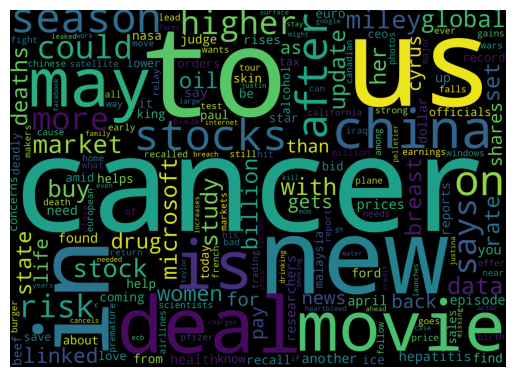

In [ ]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))

def topic_cloud(words):
  # Generating the wordcloud with the values under the category dataframe
  cloud = WordCloud(background_color='black',
    width=2500,
    height=1800
  ).generate_from_frequencies(words)
  plt.imshow(cloud)
  plt.axis('off')
  plt.show()

topic_cloud(first_topic_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


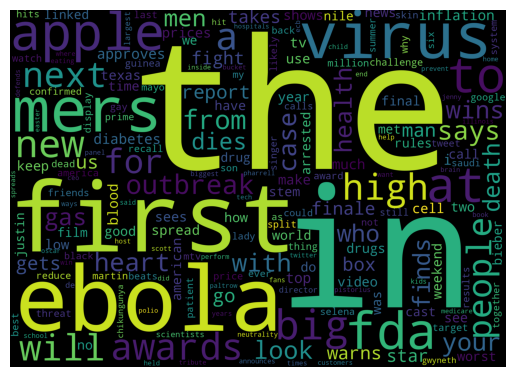

In [ ]:
topic_cloud(second_topic_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


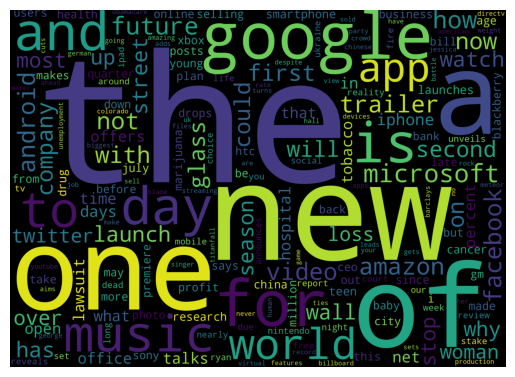

In [ ]:
topic_cloud(third_topic_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


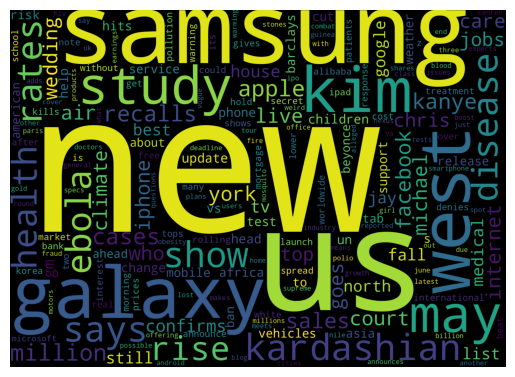

In [ ]:
topic_cloud(fourth_topic_words)

Para generar la visualización interactiva que nos permite comparar los distintos temas usamos las siguientes líneas. El resultado es interactivo así que puedes navegar a través de él.

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)
vis
# El resultado es interactivo.
# Pasad el ratón por encima de cada uno de los temas (los círculos de la derecha) para ver sus palabras más frecuentes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.113614  0.159868       1        1  26.234146
2      0.092742  0.075861       2        1  25.406510
1      0.164738 -0.073834       3        1  24.626672
3     -0.143865 -0.161894       4        1  23.732672, topic_info=          Term        Freq       Total Category  logprob  loglift
146        the  180.000000  180.000000  Default  30.0000  30.0000
1353   samsung   57.000000   57.000000  Default  29.0000  29.0000
1723    galaxy   47.000000   47.000000  Default  28.0000  28.0000
52         one   50.000000   50.000000  Default  27.0000  27.0000
2319      west   46.000000   46.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
59        says   25.529677   78.182953   Topic4  -5.2876   0.3191
485      apple   20.974693   58.294203   Topic4  -5.4841   0.4161
364   facebook   18.236011   44.385097   Topic4  -5.6240   0.5488
910        who   16.974026   33.256268   Topic4  -5.6957   0.7658
986     iphone   16.577733   30.491274   Topic4  -5.7193   0.8289

[237 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
66        2  0.632375      a
66        3  0.361357      a
378       1  0.767167  after
378       4  0.206545  after
1709      4  0.947157    air
...     ...       ...    ...
306       4  0.947144   york
366       2  0.909108  young
1887      1  0.078510   your
1887      2  0.235529   your
1887      3  0.667332   your

[273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

# Clasificación de textos

La clasificación de textos es una de las tareas más típicas en NLP.

Como ya sabéis, un problema de clasificación consiste en **predecir**, para cada **observación** de nuestro dataset, una **etiqueta** discreta. O, lo que es lo mismo, asignar a cada una de nuestras observaciones una **clase**. Estas clases o etiquetas pueden ser dos, en el caso de la **clasificación binaria**, o más de dos en el caso de la **clasificación multi-clase**. Todo esto ya lo conocéis de los módulos de aprendizaje computacional.

En el caso que nos importa ahora, lo que queremos clasificar no son objetos, personas, imágenes, etc., sino textos.

La clasificación textual tiene numerosas aplicaciones. Por ejemplo, lo usan todos los servicios de correo electrónico para distinguir spam de no-spam. Este sería un ejemplo de clasificación binaria.

También se usa para realizar análisis de sentimiento. El análisis de sentimiento consiste en determinar si un texto tiene una **connotación negativa, neutra o positiva**.

## Análisis de sentimiento con VADER

### **Paso 1 - Preparar el entorno de trabajo**

In [ ]:
import numpy as np
import pandas as pd

# text processing libraries
import re
import string
import nltk
nltk.download('stopwords') # bajar la primera vez
from nltk.corpus import stopwords

# sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,balanced_accuracy_score,roc_curve, auc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

!pip install lime # instalar la primera vez
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

!pip install vaderSentiment # instalar la primera vez
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=72f07c4bbf57ae73d076944ef9dc1e76ec4c27a777a4a533c3b2cd11098d9790
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


### **Paso 2 - Subimos los datos que vamos a usar**

In [ ]:
filename = 'tweet_disasters.csv'
train = pd.read_csv(filename)

In [ ]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Finalmente, mostramos por pantalla los textos para aquellos casos que están identificados como catástrofes.

In [ ]:
train.text[train.target == 1]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

### **Paso 3 - Vamos a realizar un EDA básico**

El primer paso de nuestro EDA es analizar la cantidad de nulos y para ello sumamos el número de registros con valor nulo para cada columna. Observa que el número de nulos en la columna location es muy elevado.

In [ ]:
#Missing values in training set
print(train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Vamos a eliminar la columna location:

In [ ]:
#eliminamos la columna location, ya que contiene muchos nulos
#la columna keyword no la vamos a utilizar, así que no hacemos nada con ella
train=train.drop(columns=["location"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7613 non-null   int64 
 1   keyword  7552 non-null   object
 2   text     7613 non-null   object
 3   target   7613 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 238.0+ KB


Lo siguiente sería explorar con más detalle la variable target. Podemos seguir 2 estrategias: hacer un conteo con la función **value_counts()** o obtener un gráfico de barras:

In [ ]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<Axes: ylabel='target'>

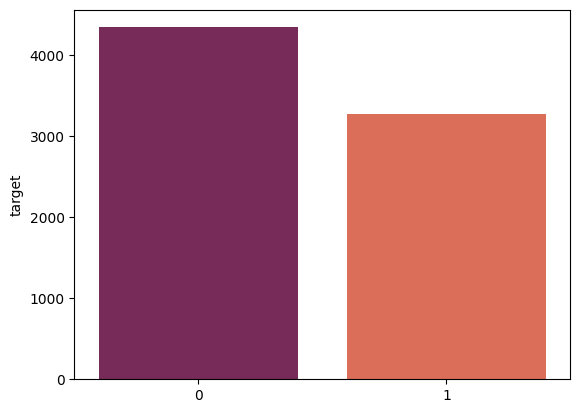

In [ ]:
sns.barplot(data=train, x=train['target'].value_counts().index,
  y=train['target'].value_counts(), palette='rocket')

Otro ejercicio, que por su simplicidad puede ser ignorado, es analizar algunas de las muestras para ambos valores.

Analizamos algunos ejemplos de tweets que corresponden a desastres:

In [ ]:
# Tweets sobre desastre
disaster_tweets = train[train['target']==1]['text']

print(disaster_tweets.values[2])
print(disaster_tweets.values[23])

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
#Kurds trampling on Turkmen flag later set it ablaze while others vandalized offices of Turkmen Front in #Diyala http://t.co/4IzFdYC3cg


Por último, visualizamos por pantalla algunos ejemplos de tweets que no correspondan a desastres:

In [ ]:
#Tweets que no van de desastres
non_disaster_tweets = train[train['target']==0]['text']
print(non_disaster_tweets.values[2])
print(non_disaster_tweets.values[23])

Summer is lovely
Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??


Por último, vamos a analizar la variable keyword, ¿qué contiene? Podemos ver que tiene 221 valores únicos y que se distribuyen de la siguiente manera:

In [ ]:
train['keyword'].nunique()

221

In [ ]:
train['keyword'].value_counts()[:20]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

<Axes: xlabel='keyword'>

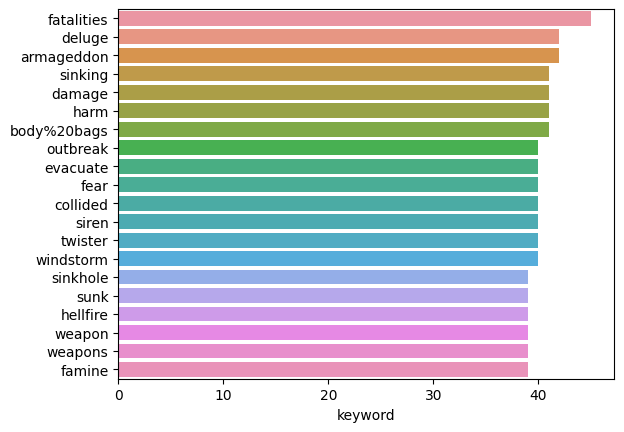

In [ ]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,
  x=train['keyword'].value_counts()[:20],
  orient='h')

¿Esta variable contiene la palabra disaster? ¿Puede haber alguna relación entre esta keyword y el valor de la variable target que queremos predecir?

In [ ]:
train.loc[train['text'].str.contains('disaster'), :][['text','target']]

text  target
6     #flood #disaster Heavy rain causes flash flood...       1
622   Volunteers needed to participate in Emergency ...       1
1162  Australia's Ashes disaster - how the collapse ...       1
1182  Australia's Ashes disaster - how the collapse ...       1
1558  Emergency responders prepare for chemical disa...       1
...                                                 ...     ...
7041  Obama Declares Disaster for Typhoon-Devastated...       1
7052  #ABCNews Obama Declares Disaster for Typhoon-D...       1
7053  Obama Declares Disaster for Typhoon-Devastated...       1
7368  NEMA Ekiti distributed relief materials to aff...       1
7449  Having your wounds kissed by Someone who doesn...       0

[109 rows x 2 columns]

In [ ]:
train.loc[train['text'].str.contains('disaster')].target.value_counts()
#parece que hay cierta correlación

1    77
0    32
Name: target, dtype: int64

### **Paso 4 - Limpiamos nuestros datos**

In [ ]:
# primera ronda de limpieza

def clean_text(text):
  '''Make text lowercase, remove text in square brackets,
  remove links, remove punctuation
  and remove words containing numbers.'''

  text = text.lower()
  text = re.sub('\[.*?\]', '', text) #remove text in square brackets
  text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
  return text

# aplicamos la función de limpieza
train['text2'] = train['text'].apply(lambda x: clean_text(x))

train.head(30)[['text', 'text2']]

text  \
0   Our Deeds are the Reason of this #earthquake M...   
1              Forest fire near La Ronge Sask. Canada   
2   All residents asked to 'shelter in place' are ...   
3   13,000 people receive #wildfires evacuation or...   
4   Just got sent this photo from Ruby #Alaska as ...   
5   #RockyFire Update => California Hwy. 20 closed...   
6   #flood #disaster Heavy rain causes flash flood...   
7   I'm on top of the hill and I can see a fire in...   
8   There's an emergency evacuation happening now ...   
9   I'm afraid that the tornado is coming to our a...   
10        Three people died from the heat wave so far   
11  Haha South Tampa is getting flooded hah- WAIT ...   
12  #raining #flooding #Florida #TampaBay #Tampa 1...   
13            #Flood in Bago Myanmar #We arrived Bago   
14  Damage to school bus on 80 in multi car crash ...   
15                                     What's up man?   
16                                      I love fruits   
17                                   Summer is lovely   
18                                  My car is so fast   
19                       What a goooooooaaaaaal!!!!!!   
20                             this is ridiculous....   
21                                  London is cool ;)   
22                                        Love skiing   
23                              What a wonderful day!   
24                                           LOOOOOOL   
25                     No way...I can't eat that shit   
26                              Was in NYC last week!   
27                                 Love my girlfriend   
28                                          Cooool :)   
29                                 Do you like pasta?   

                                                text2  
0   our deeds are the reason of this earthquake ma...  
1               forest fire near la ronge sask canada  
2   all residents asked to shelter in place are be...  
3    people receive wildfires evacuation orders in...  
4   just got sent this photo from ruby alaska as s...  
5   rockyfire update  california hwy  closed in bo...  
6   flood disaster heavy rain causes flash floodin...  
7   im on top of the hill and i can see a fire in ...  
8   theres an emergency evacuation happening now i...  
9    im afraid that the tornado is coming to our area  
10        three people died from the heat wave so far  
11  haha south tampa is getting flooded hah wait a...  
12  raining flooding florida tampabay tampa  or  d...  
13              flood in bago myanmar we arrived bago  
14  damage to school bus on  in multi car crash br...  
15                                       whats up man  
16                                      i love fruits  
17                                   summer is lovely  
18                                  my car is so fast  
19                             what a goooooooaaaaaal  
20                                 this is ridiculous  
21                                    london is cool   
22                                        love skiing  
23                               what a wonderful day  
24                                           looooool  
25                         no wayi cant eat that shit  
26                               was in nyc last week  
27                                 love my girlfriend  
28                                            cooool   
29                                  do you like pasta

### **Paso 5 - Generamos unas nubes de palabras**

Para comparar las palabras que aparecen en los dos casos tenemos que separar nuestros datos en dos conjuntos diferentes:

In [ ]:
non_disaster_tweets = train[train['target']==0]['text2']
disaster_tweets = train[train['target']==1]['text2']

Visualizamos ambas nubes de palabras, una al lado de la otra con el comando subplot:

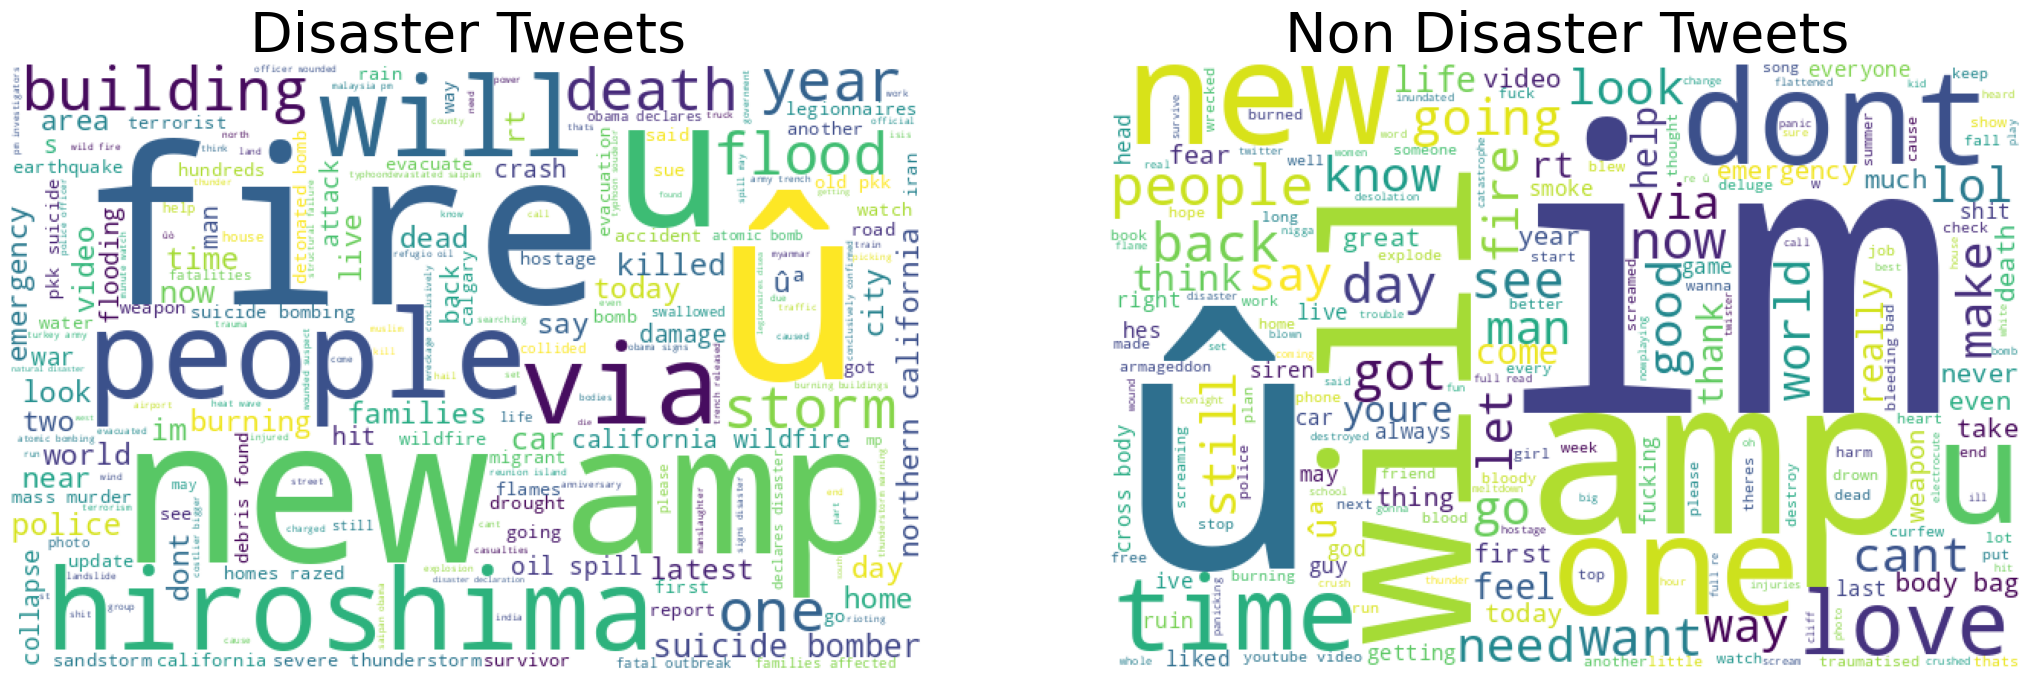

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud(background_color='white',
  width=600,
  height=400).generate(" ".join(disaster_tweets))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40)

wordcloud2 = WordCloud(background_color='white',
  width=600,
  height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

Hay algunas palabras que no parecen que aporten mucha información como ‘dont’ o ‘amp’, por eso vamos a actualizar el listado de stopwords con ellas:

In [ ]:
#actualizamos la lista de stopwords con los que hemos identificado en los wordclouds que no nos interesan (algunos son fruto de errores)
stop_words = set(stopwords.words('english'))
stop_words.update(["û", "u","dont", "im", "one", "amp", "new"])

Para mejorar las nubes de palabras vamos a seguir “normalizando” nuestros datos:

- Obtenemos los tokens de las palabras.
- Eliminamos los signos de puntuación y las stopwords.

In [ ]:
# función de preprocesado
def text_preprocessing(text):
  # 1. Data cleaning on the text variable
  nopunc = clean_text(text)

  # 2. Tokenize the cleaned_text
  tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

  # 3. Remove punctuations and stopwords
  nopunc = tokenizer.tokenize(nopunc)
  remove_stopwords = [w for w in nopunc if w not in stop_words]

  # 4. Join the information
  combined_text = ' '.join(remove_stopwords)
  return combined_text

train['text3'] = train['text'].apply(lambda x : text_preprocessing(x))

train.head(30)[['text', 'text2', 'text3']]

text  \
0   Our Deeds are the Reason of this #earthquake M...   
1              Forest fire near La Ronge Sask. Canada   
2   All residents asked to 'shelter in place' are ...   
3   13,000 people receive #wildfires evacuation or...   
4   Just got sent this photo from Ruby #Alaska as ...   
5   #RockyFire Update => California Hwy. 20 closed...   
6   #flood #disaster Heavy rain causes flash flood...   
7   I'm on top of the hill and I can see a fire in...   
8   There's an emergency evacuation happening now ...   
9   I'm afraid that the tornado is coming to our a...   
10        Three people died from the heat wave so far   
11  Haha South Tampa is getting flooded hah- WAIT ...   
12  #raining #flooding #Florida #TampaBay #Tampa 1...   
13            #Flood in Bago Myanmar #We arrived Bago   
14  Damage to school bus on 80 in multi car crash ...   
15                                     What's up man?   
16                                      I love fruits   
17                                   Summer is lovely   
18                                  My car is so fast   
19                       What a goooooooaaaaaal!!!!!!   
20                             this is ridiculous....   
21                                  London is cool ;)   
22                                        Love skiing   
23                              What a wonderful day!   
24                                           LOOOOOOL   
25                     No way...I can't eat that shit   
26                              Was in NYC last week!   
27                                 Love my girlfriend   
28                                          Cooool :)   
29                                 Do you like pasta?   

                                                text2  \
0   our deeds are the reason of this earthquake ma...   
1               forest fire near la ronge sask canada   
2   all residents asked to shelter in place are be...   
3    people receive wildfires evacuation orders in...   
4   just got sent this photo from ruby alaska as s...   
5   rockyfire update  california hwy  closed in bo...   
6   flood disaster heavy rain causes flash floodin...   
7   im on top of the hill and i can see a fire in ...   
8   theres an emergency evacuation happening now i...   
9    im afraid that the tornado is coming to our area   
10        three people died from the heat wave so far   
11  haha south tampa is getting flooded hah wait a...   
12  raining flooding florida tampabay tampa  or  d...   
13              flood in bago myanmar we arrived bago   
14  damage to school bus on  in multi car crash br...   
15                                       whats up man   
16                                      i love fruits   
17                                   summer is lovely   
18                                  my car is so fast   
19                             what a goooooooaaaaaal   
20                                 this is ridiculous   
21                                    london is cool    
22                                        love skiing   
23                               what a wonderful day   
24                                           looooool   
25                         no wayi cant eat that shit   
26                               was in nyc last week   
27                                 love my girlfriend   
28                                            cooool    
29                                  do you like pasta   

                                                text3  
0        deeds reason earthquake may allah forgive us  
1               forest fire near la ronge sask canada  
2   residents asked shelter place notified officer...  
3   people receive wildfires evacuation orders cal...  
4   got sent photo ruby alaska smoke wildfires pou...  
5   rockyfire update california hwy closed directi...  
6   flood disaster heavy rain causes flash floodin...  
7                             top hill see fire woods  
8   there

Actualizamos las nubes de palabras:

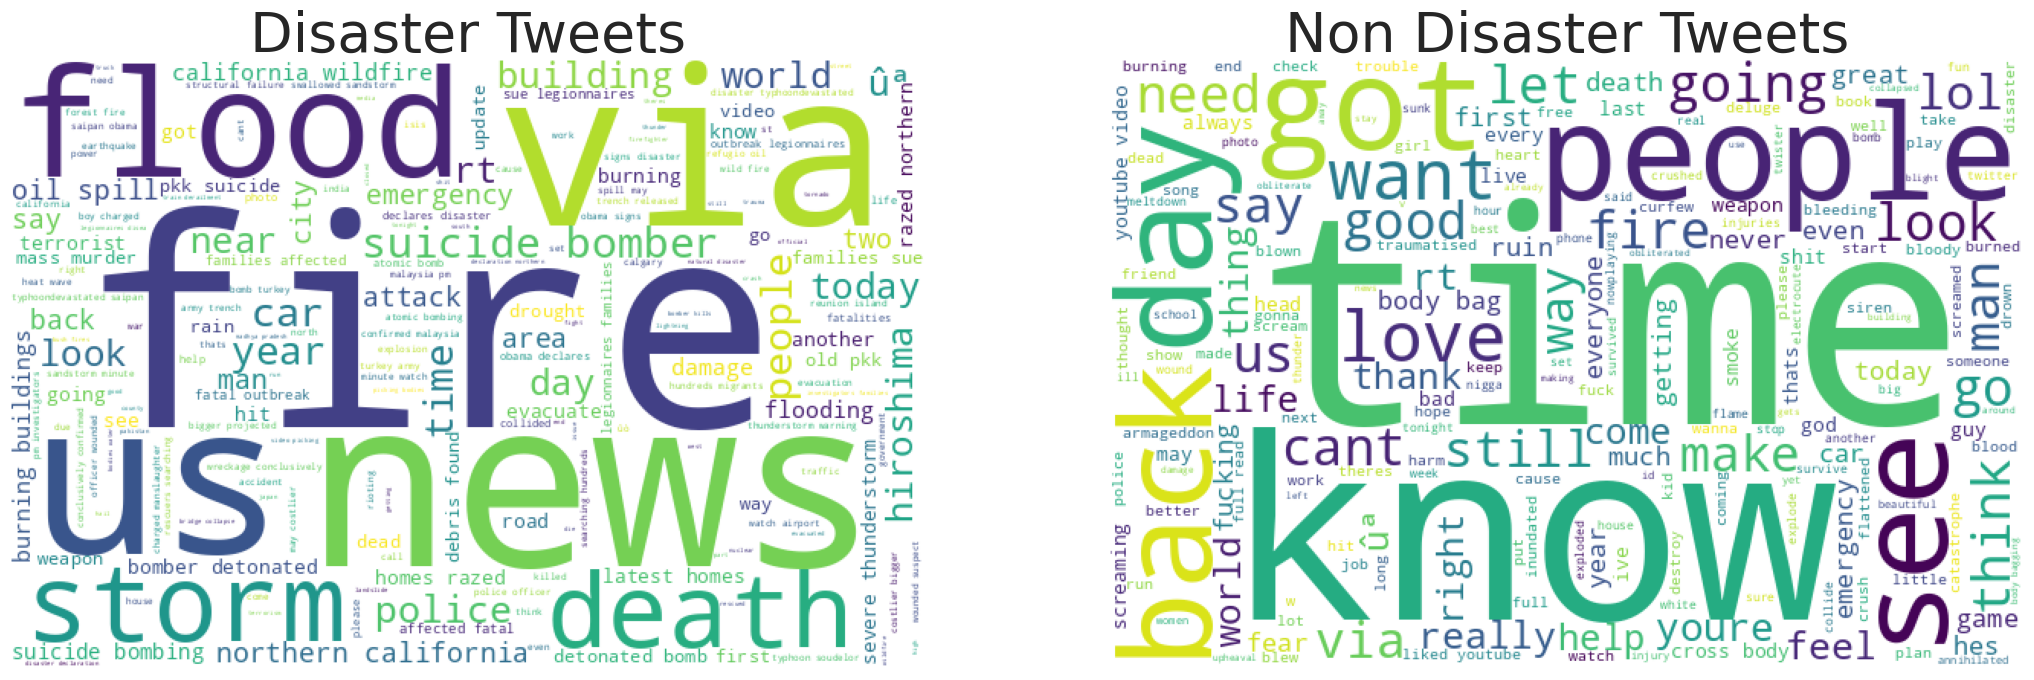

In [ ]:
non_disaster_tweets = train[train['target']==0]['text3']
disaster_tweets = train[train['target']==1]['text3']

#comprobamos que hemos eliminado las palabras que queríamos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud(background_color='white',
  width=600, height=400).generate(" ".join(disaster_tweets))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40)

wordcloud2 = WordCloud(background_color='white',
  width=600, height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

### **Paso 6 - Obtenemos la representación vectorial de los datos con TF-IDF**

Recordad que para entrenar el modelo, debemos extraer antes características numéricas de nuestros textos (es decir, vectores).

Para generar la representación TF-IDF aplicamos unos límites para obtener palabras relevantes y fijamos el máximo de componentes a 1500.

In [ ]:
tfidf = TfidfVectorizer(max_features=1500,
  min_df=2,
  max_df=0.5,
  ngram_range=(1, 2))

train_tfidf = tfidf.fit_transform(train['text3'])

train_tfidf

train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27900092, ..., 0.        , 0.        ,
        0.        ]])

### **Paso 7 - Entrenaremos un modelo de clasificación. Por completitud generamos 2 modelos: con Naive Bayes y una regresión logística**

Por completitud generamos 2 modelos: con Naive Bayes y una regresión logística.

En primer lugar vamos a separar los datos en datos para entrenar, **X**, y variable a predecir, **y**. Generamos los conjuntos de train y test.

In [ ]:
y = train['target']
X = train_tfidf

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
  random_state=42)

Entrenamos nuestro primer modelo de Naive Bayes y obtenemos varias métricas que nos permiten calibrar la calidad de nuestro modelo. No son malas métricas.

In [ ]:
clf_NB = MultinomialNB()

NB = clf_NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("F1: "+str(f1_score(y_test,y_pred)))

Accuracy: 0.7859019264448336
Precision: 0.8093385214007782
Recall: 0.6459627329192547
F1: 0.7184801381692573


Obtenemos un modelo con una regresión logística y las métricas son ligeramente mejores pero muestran que existe margen de mejora.

In [ ]:
clf_logistic = LogisticRegression()
logistic = clf_logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test,y_pred_logistic)))
print("Precision: "+str(precision_score(y_test,y_pred_logistic)))
print("Recall: "+str(recall_score(y_test,y_pred_logistic)))
print("F1: "+str(f1_score(y_test,y_pred_logistic)))

Accuracy: 0.7907180385288967
Precision: 0.7990196078431373
Recall: 0.6749482401656315
F1: 0.7317620650953984


¿Qué ideas se os ocurren para mejorar la calidad predictiva? Algunas opciones son: mejorar la limpieza de los tweets, usar otro tipo de modelos, hacer grid search para mejorar los hiperparámetros, etc.

### **Paso 8 - Explicaremos los resultados con Lime**

Primero vamos a reiniciar el index del dataframe para que luego sea más fácil trabajar. No es raro que en procesos largos los índices de los dataframe se vuelvan un poco caóticos, por ello, puede ser bueno reiniciarlos pero siempre teniendo en cuenta que los valores a lo largo del proceso pueden cambiar.

In [ ]:
#primero resetamos los índices de la numpy array para poder seleccionar tweets más fácilmente debajo
disaster_tweets.reset_index(inplace=True, drop=True)
disaster_tweets

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
3266    two giant cranes holding bridge collapse nearb...
3267    ariaahrary thetawniest control wild fires cali...
3268                                       volcano hawaii
3269    police investigating ebike collided car little...
3270    latest homes razed northern california wildfir...
Name: text3, Length: 3271, dtype: object

Para poder aplicar la librería Lime vamos a crear una pieza de código con una herramienta muy interesante y útil para un data scientist.

Vamos a usar los pipelines que vienen en la librería sklearn, se encargan de ejecutar de forma automática una serie de pasos. Puedes leer más sobre ellos [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Este pipeline se encargará de aplicar la transformación y el clasificador que hemos construido anteriormente al texto del tweet que hemos seleccionado (en nuestro caso el 58).

Sobre el resultado aplicamos Lime y mostramos los resultados que hemos visto en la explicación de la librería.

In [ ]:
vect = tfidf
classifier = logistic
c = make_pipeline(vect, classifier)

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
mystring = disaster_tweets[58] #Print a string from test instance
print(mystring)
print(c.predict_proba([mystring])) #Prediction is 1, i.e., disaster
class_names = ["not disaster", "disaster"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(text_instance=mystring,
  classifier_fn=c.predict_proba,
  num_features=10)
exp.as_list()

horrible accident man died wings airplane
[[0.16593105 0.83406895]]


[('accident', 0.1534900544053572),
 ('horrible', 0.08034150807003812),
 ('airplane', 0.06496741656788893),
 ('died', 0.05972321920861233),
 ('man', -0.050875704754444015),
 ('wings', 0.0024335641734041396)]

Finalmente hemos mostrado el gráfico que  permitirá explicar los resultados a un público menos técnico.

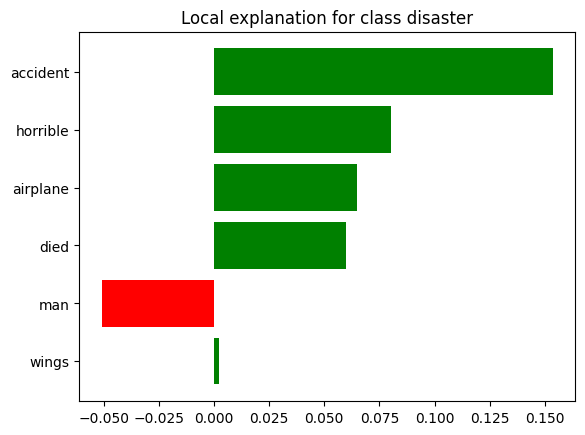

In [ ]:
fig = exp.as_pyplot_figure()

### **Paso 9 - Realizamos un análisis de sentimiento con VADER**

Para este apartado vamos a utilizar un conjunto de datos distinto, `tweets_SentimentAnalysis`.

In [ ]:
train_path = 'tweets_SentimentAnalysis.csv'

data = pd.read_csv(train_path)
data.head()

Unnamed: 0  ItemID  Sentiment  \
0           0       1          0   
1           1       2          0   
2           2       3          1   
3           3       4          0   
4           4       5          0   

                                       SentimentText  
0                       is so sad for my APL frie...  
1                     I missed the New Moon trail...  
2                            omg its already 7:30 :O  
3            .. Omgaga. Im sooo  im gunna CRy. I'...  
4           i think mi bf is cheating on me!!!   ...

In [ ]:
data.shape

(10000, 2)

Nos damos cuenta que podemos eliminar las primeras columnas y comprobamos rápidamente la presencia o ausencia de nulos.

In [ ]:
data.drop(columns=['Unnamed: 0', 'ItemID'], inplace=True)
data.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

A lo mejor os estáis preguntando qué tipo de limpieza del texto debemos llevar a cabo. Con VADER tenemos que ser muy prudentes con la limpieza ya que, recordad, VADER es sensible a emoticonos, a las mayúsculas/minúsculas, etc. En este ejercicio, simplemente no vamos a aplicar ninguna limpieza y vamos a aplicar directamente VADER sobre los datos y devolveremos 4 puntuaciones: negativo, neutro, positivo y compuesto.

In [ ]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
  score = analyser.polarity_scores(sentence)
  return score['neg'], score['neu'], score['pos'], score['compound']

Lo aplicamos sobre unas frases de prueba para comprobar el funcionamiento de la función:

In [ ]:
sentiment_analyzer_scores('I love ramen')

(0.0, 0.323, 0.677, 0.6369)

In [ ]:
sentiment_analyzer_scores('Joan is late again. She is so annoying.')

(0.333, 0.667, 0.0, -0.541)

Finalmente lo aplicamos en nuestros datos, no sin antes hacer una copia de ellos. Observa el uso de las funciones apply de manera consecutiva y cómo guardamos los resultados en 4 variables nuevas de forma simultánea.

In [ ]:
data_copy = data.copy()
data_copy[['Negative_VADER', 'Neutral_VADER', 'Positive_VADER', 'Compound_VADER']]= data_copy['SentimentText'].apply(sentiment_analyzer_scores).apply(pd.Series)
data_copy.head(20)

Sentiment                                      SentimentText  \
0           0                       is so sad for my APL frie...   
1           0                     I missed the New Moon trail...   
2           1                            omg its already 7:30 :O   
3           0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4           0           i think mi bf is cheating on me!!!   ...   
5           0                  or i just worry too much?           
6           1                 Juuuuuuuuuuuuuuuuussssst Chillin!!   
7           0         Sunny Again        Work Tomorrow  :-|  ...   
8           1        handed in my uniform today . i miss you ...   
9           1           hmmmm.... i wonder how she my number @-)   
10          0                      I must think about positive..   
11          1        thanks to all the haters up in my face a...   
12          0                     this weekend has sucked so far   
13          0             jb isnt showing in australia any more!   
14          0                               ok thats it you win.   
15          0      &lt;-------- This is the way i feel right ...   
16          0      awhhe man.... I'm completely useless rt no...   
17          1      Feeling strangely fine. Now I'm gonna go l...   
18          0       HUGE roll of thunder just now...SO scary!!!!   
19          0      I just cut my beard off. It's only been gr...   

    Negative_VADER  Neutral_VADER  Positive_VADER  Compound_VADER  
0            0.293          0.431           0.276         -0.0498  
1            0.306          0.694           0.000         -0.2960  
2            0.348          0.652           0.000         -0.2808  
3            0.114          0.886           0.000         -0.4767  
4            0.359          0.641           0.000         -0.6679  
5            0.367          0.633           0.000         -0.4404  
6            0.000          1.000           0.000          0.0000  
7            0.179          0.526           0.295          0.2732  
8            0.151          0.849           0.000         -0.1531  
9            0.000          0.843           0.157          0.0772  
10           0.000          0.526           0.474          0.5574  
11           0.213          0.610           0.177         -0.1511  
12           0.375          0.625           0.000         -0.4588  
13           0.000          1.000           0.000          0.0000  
14           0.000          0.333           0.667          0.7184  
15           0.000          1.000           0.000          0.0000  
16           0.163          0.684           0.153         -0.0498  
17           0.121          0.495           0.385          0.5859  
18           0.352          0.403           0.245         -0.3259  
19           0.066          0.696           0.237          0.6597

Ahora el objetivo es intentar crear un modelo de clasificación de sentimiento, la variable Sentiment, con estas nuevas variables que hemos generado. Para ello tenemos que eliminar la variable de salida para no considerarla en nuestro modelo y separamos los datos en entrada, X, y salida, y.

In [ ]:
data_copy.drop(columns='SentimentText', inplace=True)
X_data = data_copy.drop(columns='Sentiment')
X = X_data
y = data_copy['Sentiment']

Creamos la separación de train y test y comprobamos las dimensiones:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print(len(X_train))
print(len(X_test))

print("n_samples: {}; n_features: {}".format(X_train.shape[0],X_train.shape[1]))

7000
3000
n_samples: 7000; n_features: 4


Creamos un diccionario con los potenciales parámetros de nuestro modelo de clasificación. Observa, que para cada parámetro tenemos varias opciones.

In [ ]:
param_dict = {
  "n_estimators": [100,200,300],
  "min_samples_leaf": [1,2,4],
  "min_samples_split": [2,5,10],
  "max_depth": [int(x) for x in np.linspace(10, 110, num = 11)]
}

En el proceso de validación cruzada vamos a probar los distintos pares de parámetros para seleccionar la mejor opción.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rand_forest = RandomizedSearchCV(estimator = rf, param_distributions = param_dict, n_iter = 60, cv = 3, verbose=3, random_state=42, n_jobs = -1)
rand_forest.fit(X_train, y_train)
rand_forest.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10}

Finalmente, usamos los mejores parámetros que se ha obtenido de la validación cruzada para entrenar el modelo final sobre el que obtendremos distintas mediciones sobre la calidad del modelo.

In [ ]:
rand_forest_final = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=10,random_state=42)
rand_forest_final.fit(X_train, y_train)
RF_preds = rand_forest_final.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test,RF_preds)))
print("Precision: "+str(precision_score(y_test,RF_preds)))
print("Recall: "+str(recall_score(y_test,RF_preds)))
print("F1: "+str(f1_score(y_test,RF_preds)))

Accuracy: 0.6986666666666667
Precision: 0.7046511627906977
Recall: 0.482484076433121
F1: 0.5727788279773157


In [ ]:
RF_preds

array([0, 1, 0, ..., 1, 0, 0])

# Word embeddings

Esta es la teoría distribucional: el significado de una palabra se puede reducir a los contextos en los que es más probable que aparezca. Si conocemos estos contextos, conocemos el significado de la palabra. Dicho de otra forma, palabras que aparecen frecuentemente en contextos similares tienen significados similares.

Si esta hipótesis es correcta (y parece que lo es), capturar el significado de una palabra es lo mismo que capturar sus contextos habituales. Así que una manera de capturarlo será representar de manera vectorial estos contextos.

Hay distintas formas de hacer esto. A continuación vamos a ver algunas de ellas.

## Static Word embeddings

1. Construir una **matriz de palabras y contextos.**
2. **Reducir su dimensionalidad** (ya que estas matrices pueden llegar a ser muy grandes y además contienen muchos **elementos no informativos**, es decir, muchos, ceros).

Con “matriz de palabras y contextos” nos referimos a una matriz en la que las **filas** representan **palabras** y las **columnas** representan posibles **contextos** para estas palabras. Es decir, que los elementos de esta matriz capturan numéricamente la relación entre cada palabra y cada posible contexto.

En el paso de construcción de esta matriz hay dos decisiones a tomar:

- Qué constituye un **posible contexto**
- Cómo calculamos la **relación** entre palabra y contexto

**Entrenando "word embeddings" con Los Simpson:**


In [ ]:
import re # For preprocessing
import pandas as pd # For data handling
from time import time # To time our operations
from collections import defaultdict # For word frequency

import spacy # For preprocessing

import os # For directory settings and path
import numpy as np

!python -m spacy download en_core_web_sm # bajar la primera vez

import multiprocessing

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2023-07-03 00:59:13.860607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
df = pd.read_csv('./simpsons_dataset.csv')
df.head()

raw_character_text                                       spoken_words
0              Miss Hoover  No, actually, it was a little of both. Sometim...
1             Lisa Simpson                             Where's Mr. Bergstrom?
2              Miss Hoover  I don't know. Although I'd sure like to talk t...
3             Lisa Simpson                         That life is worth living.
4  Edna Krabappel-Flanders  The polls will be open from now until the end ...

Podemos observar que es un conjunto de datos muy grande con más de 100.000 registros y que existen varios nulos que vamos a eliminar. Hemos conseguido reducir ligeramente nuestro conjunto de datos.

In [ ]:
df.shape

(158314, 2)

In [ ]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text    0
spoken_words          0
dtype: int64

In [ ]:
df.shape

(131853, 2)

A continuación, enfrentemos la primera tarea en los problemas de NLP: la limpieza del texto. Nos vamos a valer de la librería Spacy y en el modelo de lengua anglosajona. Para reducir la carga computacional deshabilitamos el NER y el parseado.

Lematizamos y eliminamos las stopwords, así como aquellos texto muy cortos ya que apenas aportan valor.

In [ ]:
# Lematizamos y eliminamos stopwords. También eliminamos textos muy cortos.

nlp = spacy.load('en_core_web_sm',
  disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
  # Lemmatizes and removes stopwords
  # doc needs to be a spacy Doc object
  txt = [token.lemma_ for token in doc if not token.is_stop]
  # Word2Vec uses context words to learn the vector representation of a target word,
  # if a sentence is only one or two words long,
  # the benefit for the training is very small.
  if len(txt) > 2:
    return ' '.join(txt)

También normalizamos pasando todo a minúsculas y eliminando caracteres no alfabéticos.

In [ ]:
# Eliminamos caracteres no alfabéticos.

brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

Para aplicar estos dos pasos vamos a construir un pipeline de NLP y con un bucle for aplicamos la primera función. Observa que hemos incluido unas marcas temporales. Tardamos unos 2 minutos en preparar los datos.

In [ ]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 2.2 mins


Guardamos los resultados en un dataframe, eliminamos NANs y duplicados. Finalmente nos hemos quedado con unos 85.000 registros de los 131.000 originales.

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

df_clean.head()

clean
0  actually little disease magazine news show nat...
2        know sure like talk touch lesson plan teach
3                                    life worth live
4  poll open end recess case decide thought final...
7                                victory party slide

Usamos el paquete Gensim Phrases para detectar bigrams comunes de una lista de frases (https://radimrehurek.com/gensim/models/phrases.html). La razón es que queremos mantener nombres como mr_burns o bart_simpson como palabras en nuestro vocabulario.

In [ ]:
#Phrases() espera una lista de listas de palabras como input.
sent = [row.split() for row in df_clean['clean']]

phrases = Phrases(sent, min_count=30, progress_per=10000)

bigram = Phraser(phrases)

#transformamos el corpus con los bigrams detectados.
sentences = bigram[sent]
sentences

Queremos aprovechar al máximo la capacidad de computación de nuestro sistema así que necesitamos conocer el número de “cores” o de “máquinas” que estarán ejecutando nuestro código:

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

Vamos a inicializar nuestro modelo de Word2Vec. Tenemos muchos parámetros:

- **min_count**: es un entero que se usa para ignorar todas las palabras que no aparezcan un número determinado de veces, normalmente su valor está entre 2 y 100.
- **window**: entero que toma un valor entre 2 y 10 normalmente para definir la máxima distancias entre la palabra actual y la que se quiere predecir en una frase.
- **size**: entero que fluctúa entre 50 y 300 para definir la dimensionalidad del modelo.
- **sample**: número de punto flotante que se usa como umbral para reducir el peso de las palabras más frecuentes de manera aleatoria. Es un parámetro muy importante.
- **alpha**: valor de punto flotante para definir el valor inicial de la tasa a de aprendizaje, normalmente entre 0.01 y 0.05.
- **min_alpha**: valor decimal al que tiende la tasa de aprendizaje a lo largo del proceso de entrenamiento. Para definirlo se usa la fórmula alpha - (min_alpha * epochs) ~ 0.00
- **negative**: es un entero que se usa para definir el número de palabras ruidosas que se eliminan. Rango de valores: (5, 20).
- **workers:** valor entero para definir el número de hilos del proceso que van a entrenar el modelo. Un entrenamiento más rápido implica usar más hilos.

In [ ]:
w2v_model = Word2Vec(min_count=20,
  window=2,
  sample=6e-5,
  alpha=0.03,
  min_alpha=0.0007,
  negative=20,
  workers=cores-1)

Construimos el vocabulario con los parámetros definidos.

In [ ]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.02 mins


Finalmente, estamos en disposición de entrenar el modelo de Word2Vec definiendo 2 nuevos parámetros:

- **total_examples**: el número de frases.
- **epochs**: el número de iteraciones sobre nuestro corpus, puede ser 10, 20 o 30.

In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 1.07 mins


Con el modelo entrenado podemos obtener la representación vectorial de varias palabras:

In [ ]:
# los vectore se guardan en el objeto de tipo KeyedVectors: w2v_model.wv
vector = w2v_model.wv['computer']
vector

Observa que si usamos una palabra que no aparece en nuestro modelo nos aparecerá un mensaje de error:

In [ ]:
# "Paris" no está en nuestro lexikon
vector = w2v_model.wv['Paris']
vector

# Podemos comprobar si una palabra está en el lexikon:
'church' in w2v_model.wv.vocab

KeyError: ignored

Habíamos hablado de que una de las funcionalidades de este tipo de herramienta es obtener similitudes a nivel de palabras. ¿Cuáles son las palabras más similares según su significado a los principales personales?

In [ ]:
w2v_model.wv.most_similar(positive=["homer"])

[('marge', 0.7535459399223328),
 ('creepy', 0.6682054400444031),
 ('depressed', 0.6601305603981018),
 ('humiliate', 0.6530381441116333),
 ('grownup', 0.6528832912445068),
 ('sorry', 0.6361560821533203),
 ('sweetheart', 0.6340746879577637),
 ('fault', 0.6300417184829712),
 ('want', 0.6274575591087341),
 ('get_to', 0.6255638599395752)]

In [ ]:
w2v_model.wv.most_similar(positive=["marge"])

[('homer', 0.7535459995269775),
 ('sorry', 0.6747696399688721),
 ('grownup', 0.659156084060669),
 ('husband', 0.6550186276435852),
 ('affair', 0.6524028182029724),
 ('humiliate', 0.6517570614814758),
 ('wife', 0.6512305736541748),
 ('becky', 0.6511210799217224),
 ('shoulda', 0.6491946578025818),
 ('sweetheart', 0.6468856334686279)]

In [ ]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.7915506958961487),
 ('strangle', 0.7347766757011414),
 ('snuggle', 0.7171542048454285),
 ('mom', 0.7043622732162476),
 ('stampy', 0.6908771395683289),
 ('mom_dad', 0.6908169984817505),
 ('behave', 0.677108645439148),
 ('pay_attention', 0.6691753268241882),
 ('punish', 0.6682721376419067),
 ('badly', 0.6652974486351013)]

In [ ]:
w2v_model.wv.most_similar(positive=["maggie"])

[('awww', 0.6860743165016174),
 ('diaper', 0.6714256405830383),
 ('lisa', 0.6508377194404602),
 ('upset', 0.6455659866333008),
 ('asleep', 0.6412802338600159),
 ('baby', 0.6353474855422974),
 ('mom', 0.6346045732498169),
 ('bart', 0.6232793927192688),
 ('honey', 0.6171622276306152),
 ('mommy', 0.6165710091590881)]

Pero podemos responder otras preguntas, como ¿qué cosas se escriben? o ¿que se hace con un coche?

In [ ]:
w2v_model.wv.most_similar(positive=["write"])

[('poem', 0.6810948252677917),
 ('song', 0.6601344347000122),
 ('read', 0.6404719352722168),
 ('letter', 0.6287077069282532),
 ('book', 0.6178318858146667),
 ('publish', 0.6060720682144165),
 ('singing', 0.58527672290802),
 ('reading', 0.5841010808944702),
 ('coincidence', 0.576454222202301),
 ('musical', 0.5733125805854797)]

In [ ]:
w2v_model.wv.most_similar(positive=["car"])

[('drive', 0.6618916392326355),
 ('crash', 0.6440461277961731),
 ('tow', 0.6354871988296509),
 ('stack', 0.6320843696594238),
 ('bus', 0.6206137537956238),
 ('boat', 0.6188375353813171),
 ('scam', 0.6174179911613464),
 ('truck', 0.6173509359359741),
 ('wallet', 0.615781843662262),
 ('brake', 0.6123479604721069)]

Una pregunta similar es ¿cómo de similares son las dos palabras que le proporcionamos al modelo? Observa que “Moe” es más similar a “tavern” que a “Maggie”

In [ ]:
w2v_model.wv.similarity("moe", 'tavern')

0.8335393

In [ ]:
w2v_model.wv.similarity("moe", 'maggie')

0.37029943

In [ ]:
w2v_model.wv.similarity('maggie', 'baby')

0.6353474

Si proporcionamos un listado de palabras podemos buscar palabras intrusas:

In [ ]:
w2v_model.wv.doesnt_match(['jimbo', 'milhouse', 'kearney'])

'jimbo'

In [ ]:
w2v_model.wv.doesnt_match(['homer', 'patty', 'selma'])

'homer'

In [ ]:
w2v_model.wv.doesnt_match(['car', 'bike', 'food'])

'food'

In [ ]:
w2v_model.wv.doesnt_match(['car', 'bike', 'bus'])

'bike'

O buscar palabras similares a partir de relaciones:

In [ ]:
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

[('lisa', 0.6574936509132385),
 ('snuggle', 0.6120772957801819),
 ('parent', 0.5922080874443054)]

In [ ]:
w2v_model.wv.most_similar(positive=["baby", "lisa"], negative=["girl"], topn=3)

[('maggie', 0.7177366614341736),
 ('sitter', 0.6442930698394775),
 ('honey', 0.6320351958274841)]

In [ ]:
w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["man"], topn=3)

[('marge', 0.6296563148498535),
 ('sorry', 0.5875512361526489),
 ('marry', 0.5504049062728882)]

Todo esto que estamos viendo nos proporciona resultados numéricos, pero a veces puede ser interesante utilizar una visualización del modelo que se ha construido. Pero, ¿cómo podemos visualizar un espacio de alta dimensionalidad como el que hemos construido? A partir de una visualización t-SNE.

In [ ]:
# codigo inspirado en https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

def tsnescatterplot(model, word, list_names):
  """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
  its list of most similar words, and a given list of words.
  """
  arrays = np.empty((0, 100), dtype='f')
  word_labels = [word]
  color_list = ['red']

  # adds the vector of the query word
  arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

  # gets list of most similar words
  close_words = model.wv.most_similar([word])

  # adds the vector for each of the closest words to the array
  for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    color_list.append('blue')
    arrays = np.append(arrays, wrd_vector, axis=0)

  # adds the vector for each of the words from list_names to the array
  for wrd in list_names:
    wrd_vector = model.wv.__getitem__([wrd])
    word_labels.append(wrd)
    color_list.append('green')
    arrays = np.append(arrays, wrd_vector, axis=0)

  # Reduces the dimensionality from 300 to 50 dimensions with PCA
  reduc = PCA(n_components=19).fit_transform(arrays)

  # Finds t-SNE coordinates for 2 dimensions
  np.set_printoptions(suppress=True)

  Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

  # Sets everything up to plot
  df = pd.DataFrame({'x': [x for x in Y[:, 0]],
    'y': [y for y in Y[:, 1]],
    'words': word_labels,
    'color': color_list})

  fig, _ = plt.subplots()
  fig.set_size_inches(9, 9)

  # Basic plot
  p1 = sns.regplot(data=df,
    x="x",
    y="y",
    fit_reg=False,
    marker="o",
    scatter_kws={'s': 40,
      'facecolors': df['color']
    }
  )

  # Adds annotations one by one with a loop
  for line in range(0, df.shape[0]):
    p1.text(df["x"][line],
    df['y'][line],
    ' ' + df["words"][line].title(),
    horizontalalignment='left',
    verticalalignment='bottom', size='medium',
    color=df['color'][line],
    weight='normal'
  ).set_size(15)


  plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
  plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

  plt.title('t-SNE visualization for {}'.format(word.title()))

Vamos a generar unos scatterplot al que proporcionamos un listado de palabras con el que comparar una palabra. En azul vemos las palabras más parecidas a "Homer"y en verde, las 10 palabras de la lista introducida.

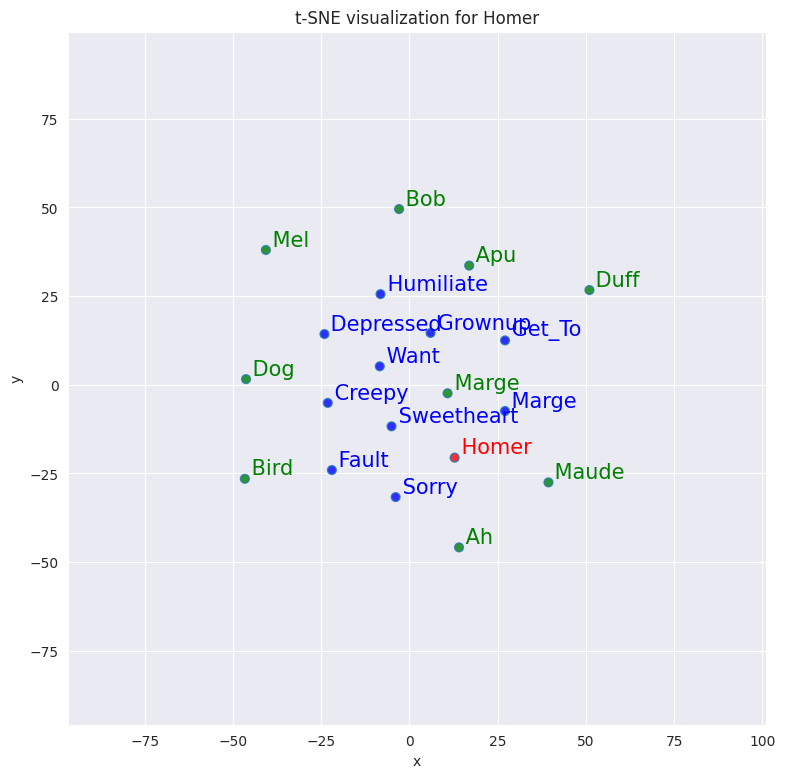

In [ ]:
tsnescatterplot(w2v_model, 'homer', ['marge', 'dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])
# en azul vemos las palabras más parecidas a "Homer"y en verde, las 10 palabras de la lista introducida.

Observa que podemos generar un gráfico similar con el listado de palabras más similares para otra palabra combinando lo que hemos visto antes:

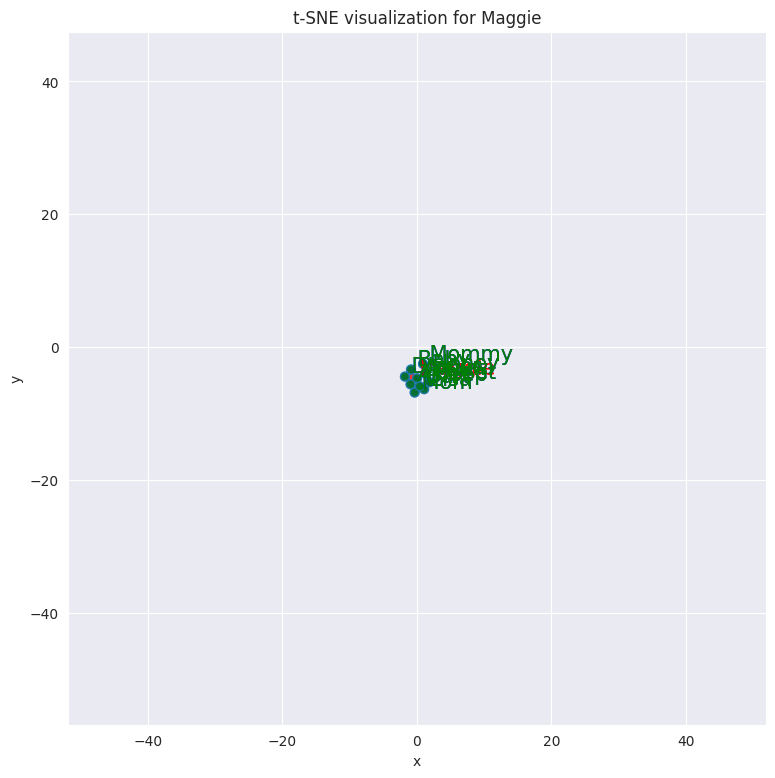

In [ ]:
tsnescatterplot(w2v_model,
  'maggie',
  [i[0] for i in w2v_model.wv.most_similar(positive=["maggie"])])